## Exploratory Data Analysis

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox 
from scipy.stats import yeojohnson
from scipy.stats import skew
%matplotlib inline

### Eksplorasi Awal Dataset

In [173]:
# Pilih Bank: BCA/BRI/MRI/BNI/BTN

bank = 'BRI'
bank_dataset = 'B' + bank + '.csv'
print(bank_dataset)

BBRI.csv


In [174]:
df = pd.read_csv(bank_dataset, usecols=['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close'])
df

Date      Open      High       Low     Close Adj Close  Volume
0     1/4/2016  2,280.00  2,320.00  2,240.00  2,295.00  1,935.29  100.38
1     1/5/2016  2,315.00  2,365.00  2,315.00  2,315.00  1,952.16  108.04
2     1/6/2016  2,280.00  2,355.00  2,280.00  2,305.00  1,943.73  105.13
3     1/7/2016  2,270.00  2,305.00  2,250.00  2,250.00  1,897.35   71.28
4     1/8/2016  2,250.00  2,340.00  2,250.00  2,320.00  1,956.38  106.50
...        ...       ...       ...       ...       ...       ...     ...
1467       NaN       NaN       NaN       NaN       NaN       NaN     NaN
1468       NaN       NaN       NaN       NaN       NaN       NaN     NaN
1469       NaN       NaN       NaN       NaN       NaN       NaN     NaN
1470       NaN       NaN       NaN       NaN       NaN       NaN     NaN
1471       NaN       NaN       NaN       NaN       NaN       NaN     NaN

[1472 rows x 7 columns]

### Memunculkan Missing Values pada Dataset

In [175]:
df = df.dropna()
startdate = df['Date'].iloc[0]
enddate = df['Date'].iloc[-1]

start = datetime.datetime.strptime(startdate, "%m/%d/%Y")
end = datetime.datetime.strptime(enddate, "%m/%d/%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

dates = []
for date in date_generated:
    readable_date = date.strftime("%m/%d/%Y")
    dates.append(readable_date)
    
df_dates = pd.DataFrame(dates)
df_dates[0] = pd.to_datetime(df_dates[0])
df_dates.columns = ['Date']

In [176]:
df_copy = df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [177]:
df = pd.merge(df_dates, df_copy, how='left')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2005 non-null   datetime64[ns]
 1   Open       1380 non-null   object        
 2   High       1380 non-null   object        
 3   Low        1380 non-null   object        
 4   Close      1380 non-null   object        
 5   Adj Close  1380 non-null   object        
 6   Volume     1380 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 125.3+ KB


#### Menyeragamkan Format Penulisan Data

In [179]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 
                                                                  'Adj Close', 'Volume']].astype(str)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2005 non-null   datetime64[ns]
 1   Open       2005 non-null   object        
 2   High       2005 non-null   object        
 3   Low        2005 non-null   object        
 4   Close      2005 non-null   object        
 5   Adj Close  2005 non-null   object        
 6   Volume     2005 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 125.3+ KB


In [181]:
df['Open'] = df['Open'].str.slice(0, -3, 1)
df['Open'] = df['Open'].str.replace(r',', '')
df['Open'] = pd.to_numeric(df['Open'])

df['High'] = df['High'].str.slice(0, -3, 1)
df['High'] = df['High'].str.replace(r',', '')
df['High'] = pd.to_numeric(df['High'])

df['Low'] = df['Low'].str.slice(0, -3, 1)
df['Low'] = df['Low'].str.replace(r',', '')
df['Low'] = pd.to_numeric(df['Low'])

df['Close'] = df['Close'].str.slice(0, -3, 1)
df['Close'] = df['Close'].str.replace(r',', '')
df['Close'] = pd.to_numeric(df['Close'])

df['Adj Close'] = df['Adj Close'].replace(r'nan', np.nan)
df['Adj Close'] = df['Adj Close'].str.replace(r',', '')
df['Adj Close'] = pd.to_numeric(df['Adj Close'])

df['Volume'] = df['Volume'].replace(r'nan', np.nan)
df['Volume'] = df['Volume'].str.replace(r'.', '')
df['Volume'] = df['Volume'].str.replace(r',', '')
df['Volume'] = pd.to_numeric(df['Volume'])

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2005 non-null   datetime64[ns]
 1   Open       1380 non-null   float64       
 2   High       1380 non-null   float64       
 3   Low        1380 non-null   float64       
 4   Close      1380 non-null   float64       
 5   Adj Close  1380 non-null   float64       
 6   Volume     1380 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 125.3 KB


In [183]:
df.describe().T  # Statistik dasar

count          mean          std      min      25%       50%  \
Open       1380.0   3333.112319   778.015063  1915.00  2633.75   3210.00   
High       1380.0   3369.000000   781.511231  1940.00  2687.50   3280.00   
Low        1380.0   3291.786232   765.985349  1905.00  2608.75   3165.00   
Close      1380.0   3329.525362   773.417430  1905.00  2630.00   3210.00   
Adj Close  1380.0   3082.061348   816.263459  1647.27  2499.28   3033.64   
Volume     1380.0  11363.373913  8795.583285     0.00  6487.00  10125.50   

                  75%       max  
Open        4030.0000   4920.00  
High        4072.5000   4950.00  
Low         3980.0000   4800.00  
Close       4022.5000   4890.00  
Adj Close   3866.8725   4785.32  
Volume     14311.7500  87261.00

In [184]:
df

Date    Open    High     Low   Close  Adj Close   Volume
0    2016-01-04  2280.0  2320.0  2240.0  2295.0    1935.29  10038.0
1    2016-01-05  2315.0  2365.0  2315.0  2315.0    1952.16  10804.0
2    2016-01-06  2280.0  2355.0  2280.0  2305.0    1943.73  10513.0
3    2016-01-07  2270.0  2305.0  2250.0  2250.0    1897.35   7128.0
4    2016-01-08  2250.0  2340.0  2250.0  2320.0    1956.38   1065.0
...         ...     ...     ...     ...     ...        ...      ...
2000 2021-06-26     NaN     NaN     NaN     NaN        NaN      NaN
2001 2021-06-27     NaN     NaN     NaN     NaN        NaN      NaN
2002 2021-06-28  3980.0  3990.0  3930.0  3930.0    3930.00  14123.0
2003 2021-06-29  3860.0  3910.0  3860.0  3900.0    3900.00  12177.0
2004 2021-06-30  3900.0  3970.0  3890.0  3940.0    3940.00  11285.0

[2005 rows x 7 columns]

### Analisis Univariat Awal

Analisis berikut ini merupakan analisis univariat sederhana setiap variabel inti analisis. Perlu
diperhatikan bahwa seluruh analisis pada bagian ini belum mempertimbangkan karakteristik
sekuensial time series yang sebenarnya dimiliki oleh seluruh variabel yang dianalisis.

### 1) Open

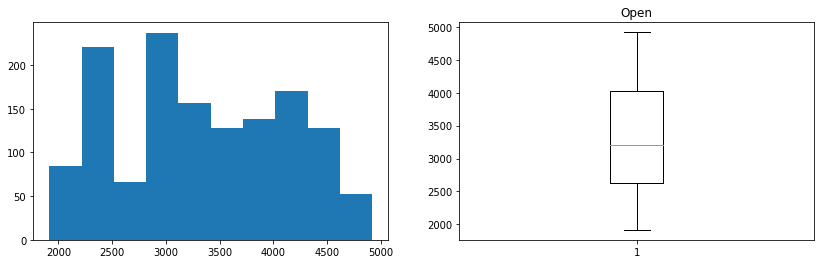

In [185]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Open')
ax1.hist(df['Open'][~np.isnan(df['Open'])], density=False)
ax2.boxplot(df['Open'][~np.isnan(df['Open'])])
plt.show()

In [186]:
df['Open'].skew()  # Semakin mendekati 0, maka akan semakin mendekati distribusi normal

0.05962348103414579

### 2) High

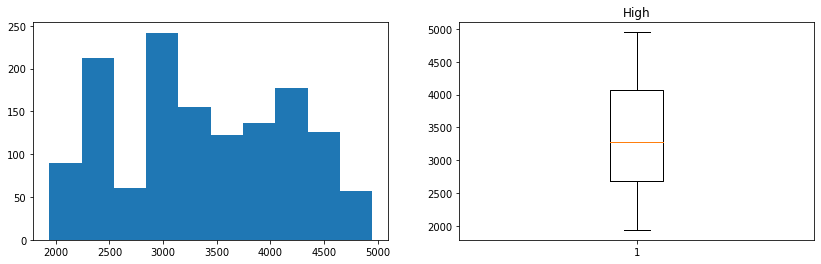

In [187]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('High')
ax1.hist(df['High'][~np.isnan(df['High'])], density=False)
ax2.boxplot(df['High'][~np.isnan(df['High'])])
plt.show()

In [188]:
df['High'].skew()

0.04043531224425488

### 3) Low

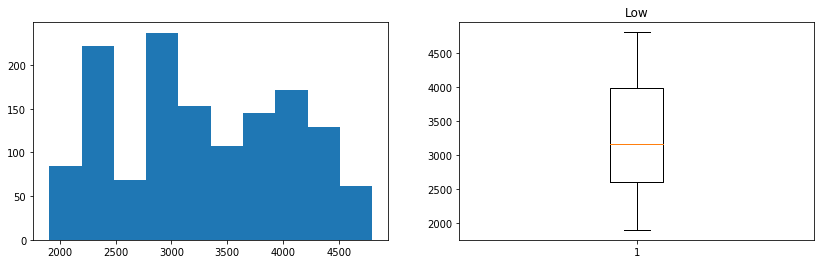

In [189]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Low')
ax1.hist(df['Low'][~np.isnan(df['Low'])], density=False)
ax2.boxplot(df['Low'][~np.isnan(df['Low'])])
plt.show()

In [190]:
df['Low'].skew()

0.06052906847152722

### 4) Volume

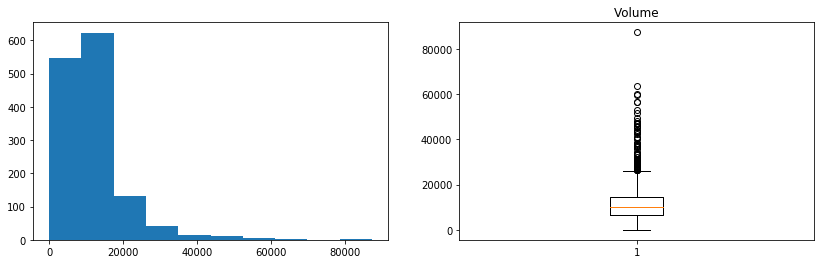

In [191]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Volume')
ax1.hist(df['Volume'][~np.isnan(df['Volume'])], density=False)
ax2.boxplot(df['Volume'][~np.isnan(df['Volume'])])
plt.show()

In [192]:
df['Volume'].skew()

2.187188852370578

### 5) Adj Close

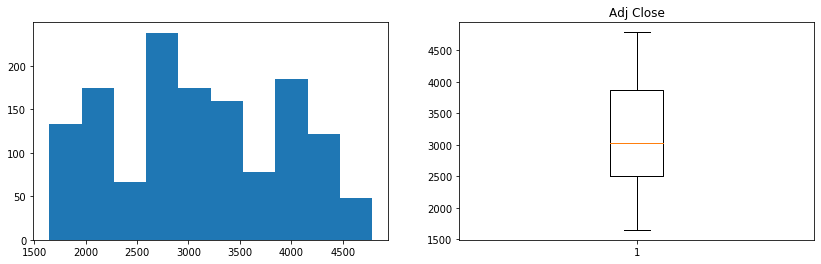

In [193]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Adj Close')
ax1.hist(df['Adj Close'][~np.isnan(df['Adj Close'])], density=False)
ax2.boxplot(df['Adj Close'][~np.isnan(df['Adj Close'])])
plt.show()

In [194]:
df['Adj Close'].skew()

0.07791310704312783

### 6) Close

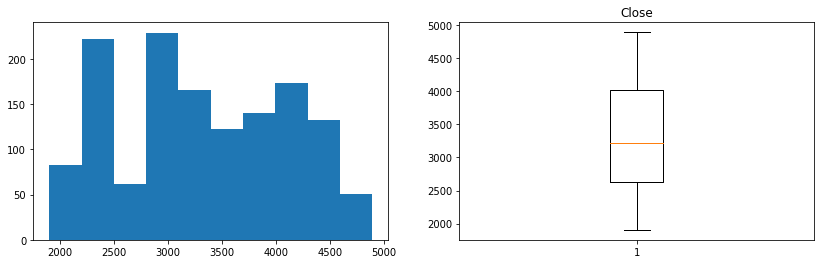

In [195]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Close')
ax1.hist(df['Close'][~np.isnan(df['Close'])], density=False)
ax2.boxplot(df['Close'][~np.isnan(df['Close'])])
plt.show()

In [196]:
df['Close'].skew()

0.0497906779467425

### Analisis Multivariat

Pada analisis multivariat, akan dilihat hubungan kovarians dan korelasi antar variabel. Kovarians yang bernilai positif antara variabel A dan B bermakna bahwa nilai A dan B berbanding lurus (Semakin besar nilai A, maka semakin besar pula nilai B). Sebaliknya, nilai kovarians yang negatif bermakna bahwa nilai A dan B berbanding terbalik. 

Sementara itu, nilai korelasi menunjukkan tingkat "kekuatan" hubungan yang diperoleh. Nilai korelasi yang mendekati 0 bermakna bahwa hubungan antara A dan B yang diperoleh (baik itu berbanding lurus ataupun terbalik) tidak signifikan/sangat lemah.

#### Kovarians

In [197]:
df.cov()

Open           High            Low          Close  \
Open       605307.438427  606939.644670  594971.811555  599824.411580   
High       606939.644670  610759.804206  597015.239304  603370.681653   
Low        594971.811555  597015.239304  586733.554705  591523.473518   
Close      599824.411580  603370.681653  591523.473518  598174.520749   
Adj Close  628532.788442  633228.915888  618287.645053  626036.238711   
Volume    -344781.106567 -178394.226976 -451460.429076 -311935.703471   

               Adj Close        Volume  
Open       628532.788442 -3.447811e+05  
High       633228.915888 -1.783942e+05  
Low        618287.645053 -4.514604e+05  
Close      626036.238711 -3.119357e+05  
Adj Close  666286.034145  4.360660e+03  
Volume       4360.659836  7.736229e+07

#### Korelasi

In [198]:
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998211  0.998362  0.996832   0.989714 -0.050384
High       0.998211  1.000000  0.997309  0.998240   0.992648 -0.025953
Low        0.998362  0.997309  1.000000  0.998476   0.988871 -0.067009
Close      0.996832  0.998240  0.998476  1.000000   0.991643 -0.045855
Adj Close  0.989714  0.992648  0.988871  0.991643   1.000000  0.000607
Volume    -0.050384 -0.025953 -0.067009 -0.045855   0.000607  1.000000

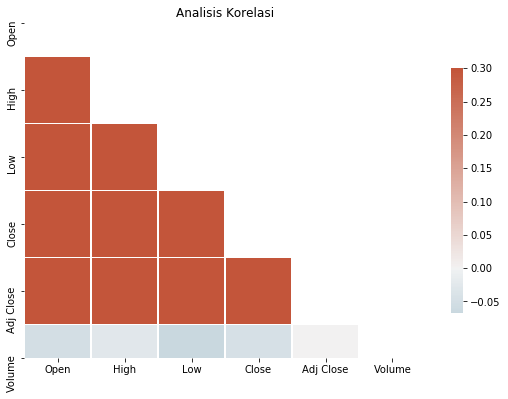

In [199]:
# Heatmap Visualization

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle

fig, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.title('Analisis Korelasi')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Hasil analisis multivariat menunjukkan bahwa variabel Volume tidak memiliki hubungan yang signifikan dengan variabel target (Close). Dengan kata lain, dapat disimpulkan bahwa nilai indeks saham tidak dipengaruhi secara signifikan oleh Volume.

Selain itu, diperoleh informasi bahwa terdapat hubungan yang kuat antara seluruh variabel independen selain Volume. Ini menunjukkan adanya multikolinearitas pada dataset yang digunakan, di mana terdapat korelasi antar variabel independen yang digunakan untuk memprediksi variabel target (Close). Dengan demikian, dapat dipertimbangkan untuk melakukan feature selection terlebih dahulu pada analisis lebih lanjut.

### Data Preprocessing

### Null Values Handling

In [200]:
df.isnull().sum()

Date           0
Open         625
High         625
Low          625
Close        625
Adj Close    625
Volume       625
dtype: int64

#### Mengisi null values

In [201]:
df = df.interpolate(method='linear')  # Melakukan interpolasi pada missing/null values
df

Date         Open         High     Low   Close  Adj Close   Volume
0    2016-01-04  2280.000000  2320.000000  2240.0  2295.0    1935.29  10038.0
1    2016-01-05  2315.000000  2365.000000  2315.0  2315.0    1952.16  10804.0
2    2016-01-06  2280.000000  2355.000000  2280.0  2305.0    1943.73  10513.0
3    2016-01-07  2270.000000  2305.000000  2250.0  2250.0    1897.35   7128.0
4    2016-01-08  2250.000000  2340.000000  2250.0  2320.0    1956.38   1065.0
...         ...          ...          ...     ...     ...        ...      ...
2000 2021-06-26  4013.333333  4023.333333  3970.0  3970.0    3970.00   9747.0
2001 2021-06-27  3996.666667  4006.666667  3950.0  3950.0    3950.00  11935.0
2002 2021-06-28  3980.000000  3990.000000  3930.0  3930.0    3930.00  14123.0
2003 2021-06-29  3860.000000  3910.000000  3860.0  3900.0    3900.00  12177.0
2004 2021-06-30  3900.000000  3970.000000  3890.0  3940.0    3940.00  11285.0

[2005 rows x 7 columns]

In [202]:
df.isnull().sum()  # Cek null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Outliers Handling

### Data Transformation

Pada bagian ini, dilakukan transformasi setiap variabel agar menjadi lebih berdistribusi normal dan sesuai dengan kebutuhan mayoritas model, sekaligus untuk menangani outliers secara tidak langsung. Namun, perlu diperhatikan bahwa penanganan outliers dengan teknik ini masih belum mempertimbangkan karakteristik sekuensial time-series yang sebenarnya dimiliki oleh data.

### 1) Open

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


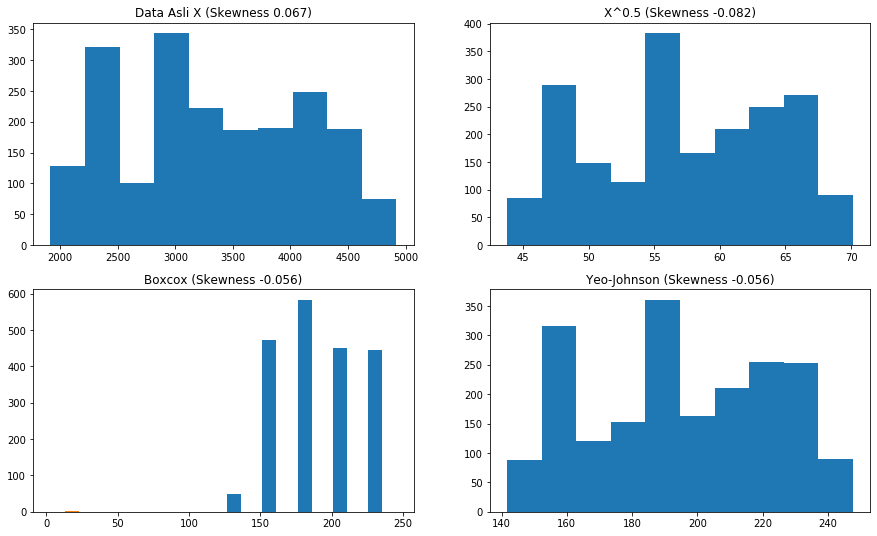

In [203]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Open']).skew()
ax[0,0].hist(df['Open'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Open']**0.5).skew()
ax[0,1].hist(df['Open']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Open'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Open']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_open, lambda_data = yeojohnson(df['Open'])
skew_yeo = skew(trans_data_open)
ax[1,1].hist(trans_data_open, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

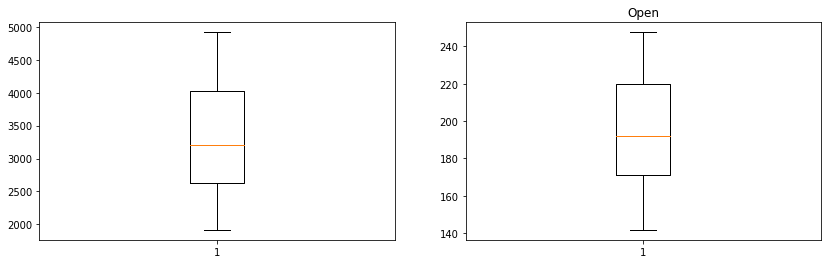

In [204]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Open')
ax1.boxplot(df['Open'])
ax2.boxplot(trans_data_open)
plt.show()

### 2) High

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


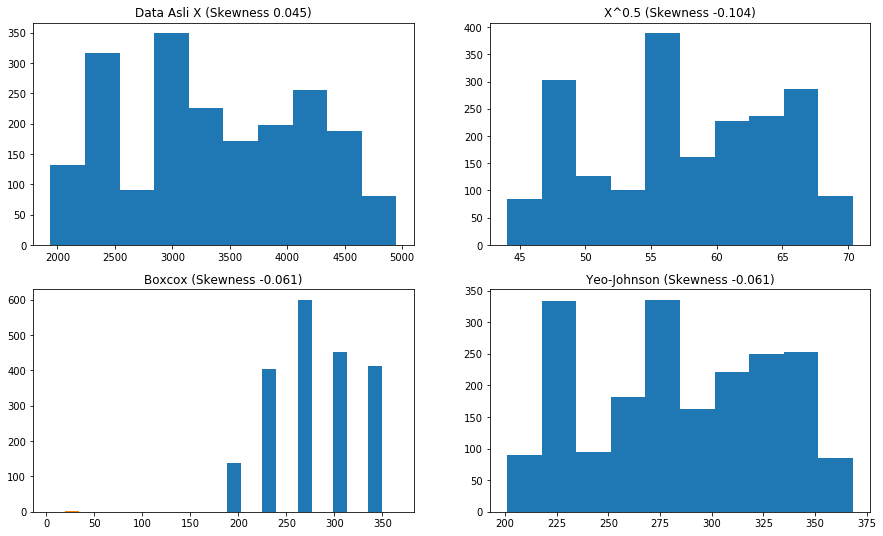

In [205]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['High']).skew()
ax[0,0].hist(df['High'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['High']**0.5).skew()
ax[0,1].hist(df['High']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['High'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['High']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_high, lambda_data = yeojohnson(df['High'])
skew_yeo = skew(trans_data_high)
ax[1,1].hist(trans_data_high, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

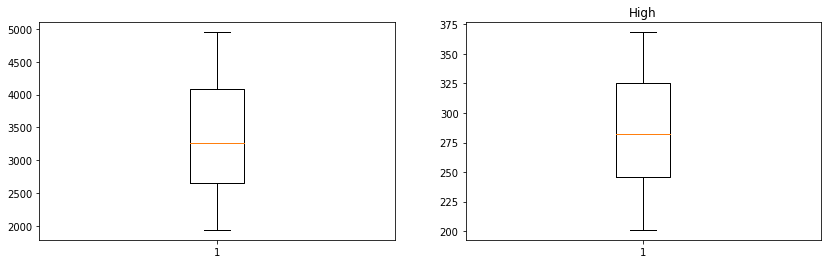

In [206]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('High')
ax1.boxplot(df['High'])
ax2.boxplot(trans_data_high)
plt.show()

### 3) Low

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


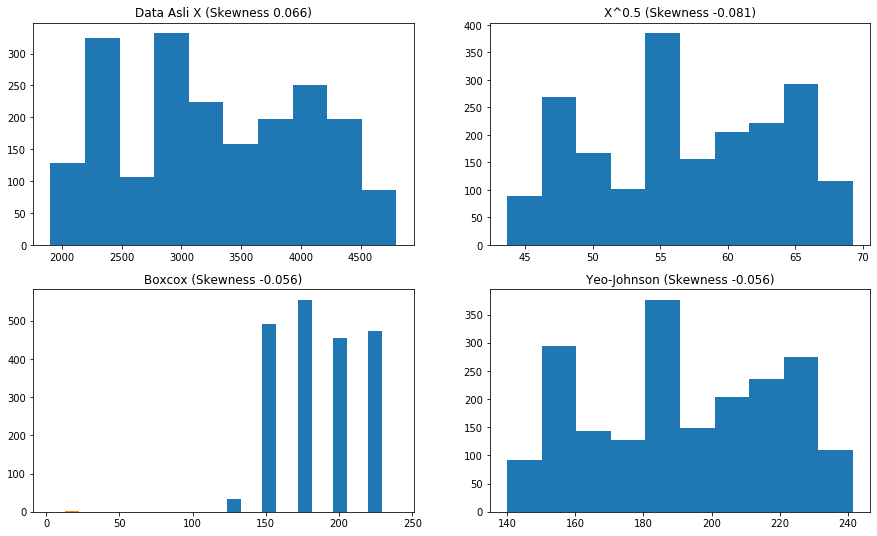

In [207]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Low']).skew()
ax[0,0].hist(df['Low'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Low']**0.5).skew()
ax[0,1].hist(df['Low']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Low'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Low']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_low, lambda_data = yeojohnson(df['Low'])
skew_yeo = skew(trans_data_low)
ax[1,1].hist(trans_data_low, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

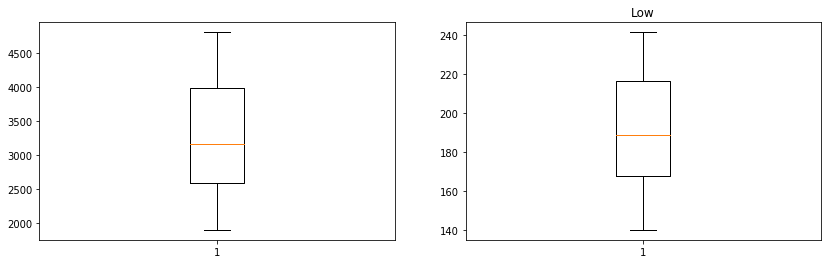

In [208]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Low')
ax1.boxplot(df['Low'])
ax2.boxplot(trans_data_low)
plt.show()

### 4) Volume

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


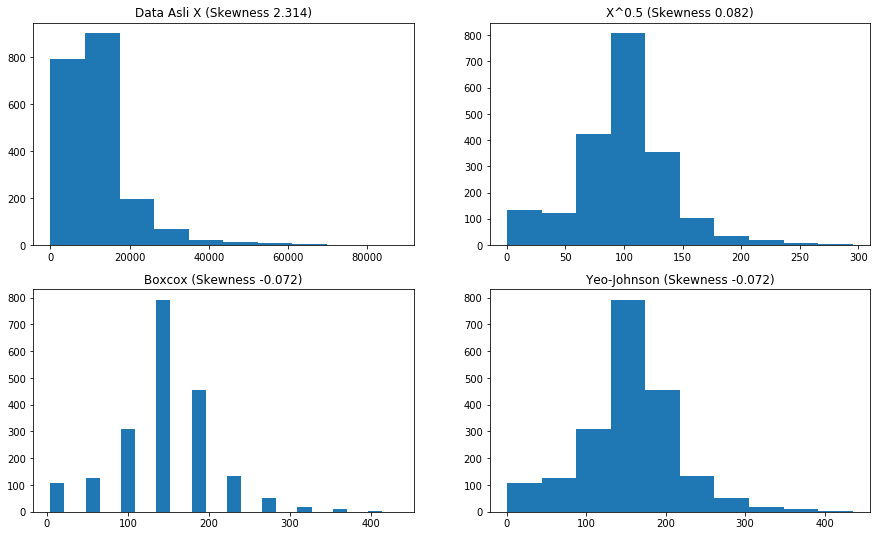

In [209]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Volume']).skew()
ax[0,0].hist(df['Volume'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Volume']**0.5).skew()
ax[0,1].hist(df['Volume']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')

skew_c = pd.DataFrame(boxcox(df['Volume']+1)[0]).skew()[0]
ax[1,0].hist(boxcox(df['Volume']+1), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_volume, lambda_data = yeojohnson(df['Volume'])
skew_yeo = skew(trans_data_volume)
ax[1,1].hist(trans_data_volume, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

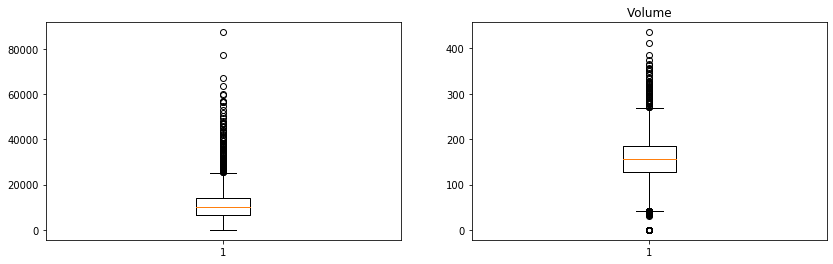

In [210]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Volume')
ax1.boxplot(df['Volume'])
ax2.boxplot(trans_data_volume)
plt.show()

### 5) Adj Close

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


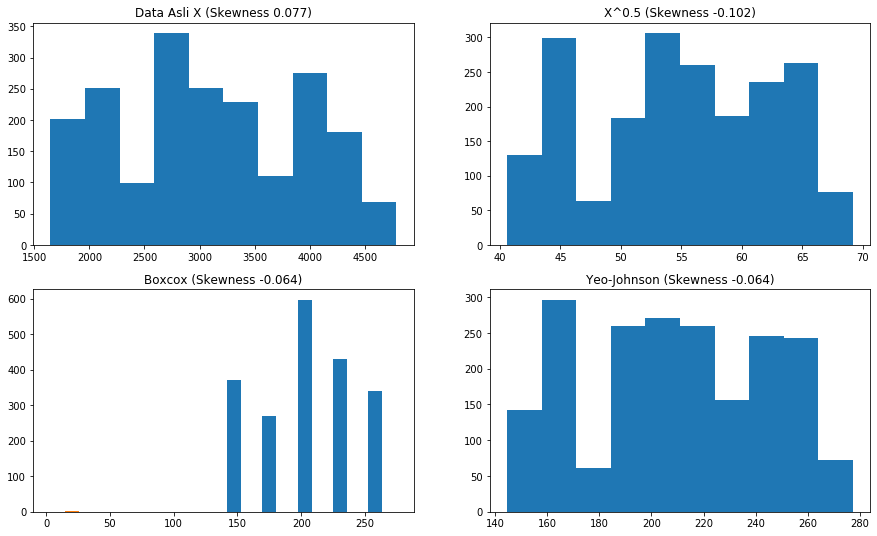

In [211]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Adj Close']).skew()
ax[0,0].hist(df['Adj Close'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Adj Close']**0.5).skew()
ax[0,1].hist(df['Adj Close']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Adj Close'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Adj Close']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_adj, lambda_data = yeojohnson(df['Adj Close'])
skew_yeo = skew(trans_data_adj)
ax[1,1].hist(trans_data_adj, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

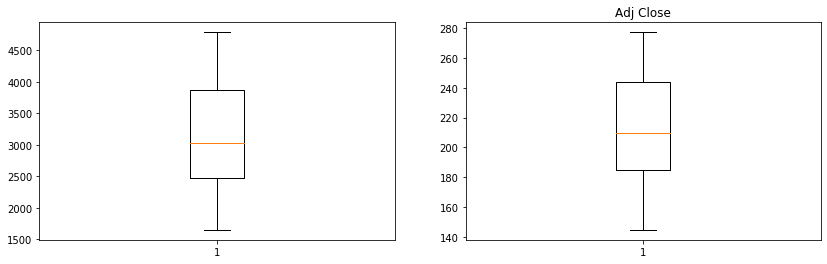

In [212]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Adj Close')
ax1.boxplot(df['Adj Close'])
ax2.boxplot(trans_data_adj)
plt.show()

### 6) Close

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


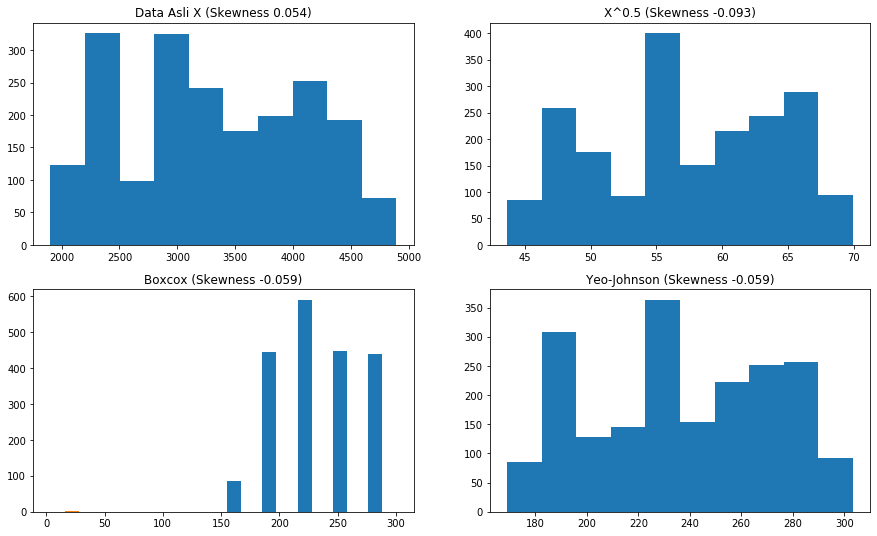

In [213]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Close']).skew()
ax[0,0].hist(df['Close'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Close']**0.5).skew()
ax[0,1].hist(df['Close']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Close'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Close']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_close, lambda_data = yeojohnson(df['Close'])
skew_yeo = skew(trans_data_close)
ax[1,1].hist(trans_data_close, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

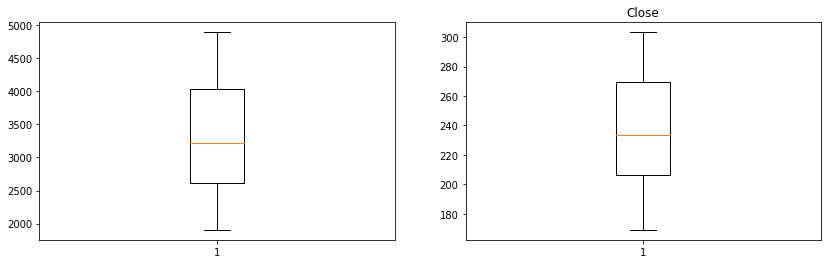

In [214]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Close')
ax1.boxplot(df['Close'])
ax2.boxplot(trans_data_close)
plt.show()

In [215]:
df_transformed = df.copy()

df_transformed['Open'] = trans_data_open
df_transformed['High'] = trans_data_high
df_transformed['Low'] = trans_data_low
df_transformed['Volume'] = trans_data_volume
df_transformed['Adj Close'] = trans_data_adj
df_transformed['Close'] = trans_data_close

df_transformed = df_transformed.reset_index(drop=True)
df_transformed

Date        Open        High         Low       Close   Adj Close  \
0    2016-01-04  157.130839  225.681739  154.031540  189.751548  159.632709   
1    2016-01-05  158.555458  228.505807  157.058949  190.777415  160.481799   
2    2016-01-06  157.130839  227.879904  155.651304  190.264908  160.057869   
3    2016-01-07  156.722148  224.736051  154.437599  187.430729  157.712397   
4    2016-01-08  155.902526  226.939270  154.437599  191.033350  160.693744   
...         ...         ...         ...         ...         ...         ...   
2000 2021-06-26  219.552151  322.200541  215.915417  266.631059  247.462775   
2001 2021-06-27  219.013034  321.337474  215.273731  265.797437  246.702585   
2002 2021-06-28  218.472985  320.473126  214.630695  264.962195  245.940875   
2003 2021-06-29  214.556664  316.306182  212.369295  263.706268  244.795435   
2004 2021-06-30  215.867627  319.434206  213.340533  265.380019  246.321921   

          Volume  
0     157.046375  
1     162.617136  
2     160.526387  
3     133.492718  
4      53.619812  
...          ...  
2000  154.870969  
2001  170.470976  
2002  184.610985  
2003  172.099314  
2004  166.008303  

[2005 rows x 7 columns]

### Analisis Univariat Lanjutan & Pendeteksian Anomali

Pada bagian ini, akan dilakukan analisis tren setiap variabel terhadap variabel ‘Date’ sekaligus melakukan penanganan outliers (anomali) lanjutan, yaitu dengan mempertimbangkan karakteristik sekuensial time-series yang dimiliki oleh setiap variabel pada data.

### 1) Open

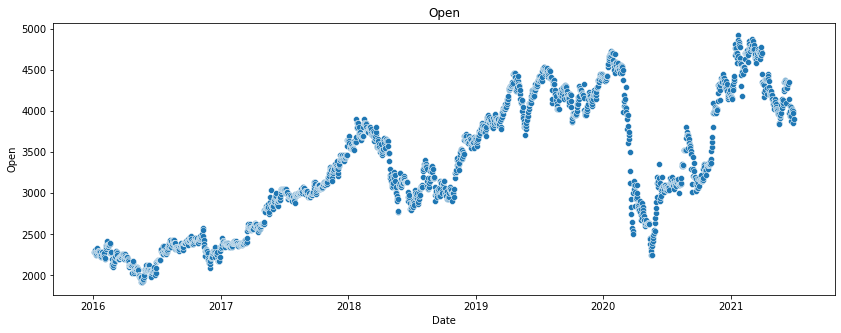

In [216]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Open')
sns.scatterplot(x=df['Date'], y=df['Open'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [217]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [218]:
adfullertest(df['Open'])

ADF Statistics: -1.7971882640039678
p-Value: 0.3818585333436091
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [219]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

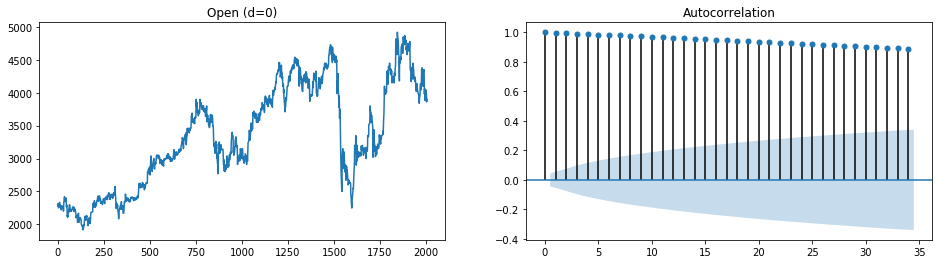

In [220]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'])
ax1.set_title('Open (d=0)')
plot_acf(df['Open'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

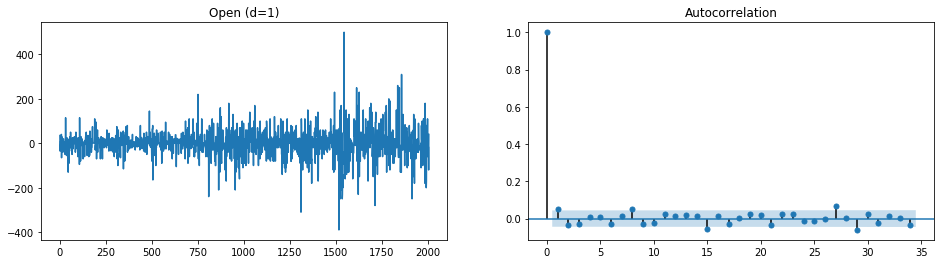

In [221]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_acf(df['Open'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

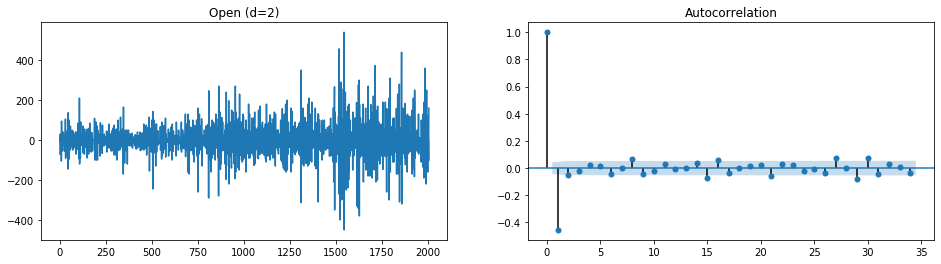

In [222]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().diff().dropna())
ax1.set_title('Open (d=2)')
plot_acf(df['Open'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [223]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Open'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

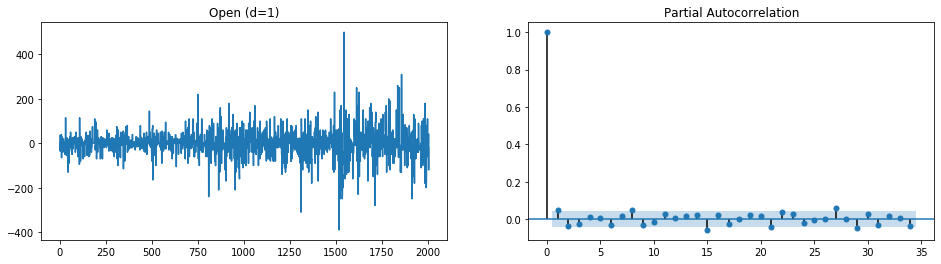

In [224]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_pacf(df['Open'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 2.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

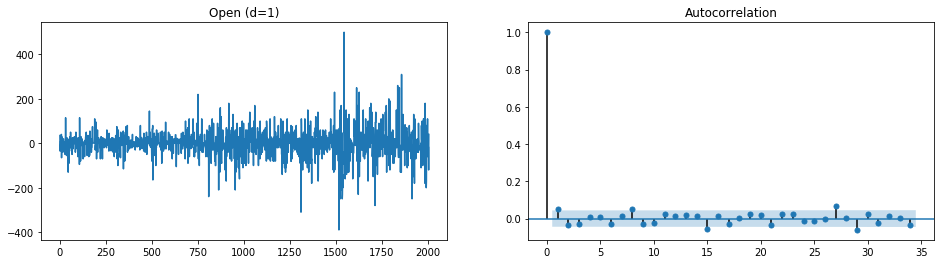

In [225]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_acf(df['Open'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 2.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(2,1,2)

In [227]:
model = ARIMA(df['Open'], order=(2,1,2))
result = model.fit()

In [228]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2005
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10865.963
Date:                Sat, 11 Dec 2021   AIC                          21741.926
Time:                        23:07:48   BIC                          21769.940
Sample:                             0   HQIC                         21752.211
                               - 2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7572      0.046    -16.286      0.000      -0.848      -0.666
ar.L2         -0.8661      0.039    -22.036      0.000      -0.943      -0.789
ma.L1          0.8005      0.043     18.526      0.0

### Model Fitting

In [229]:
df_dummy = df.copy()

In [230]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Open'] - df_dummy['forecast']

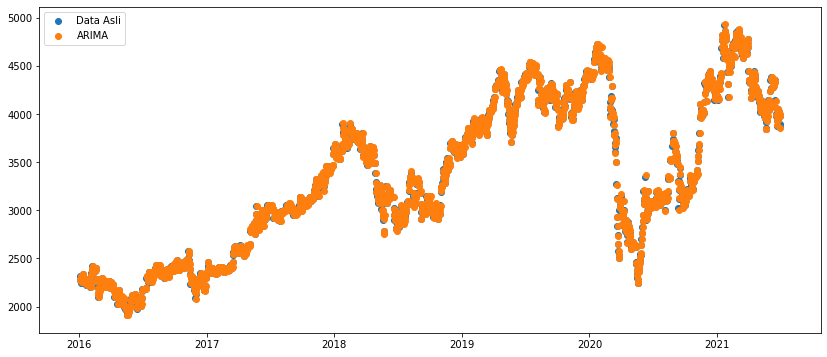

In [231]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

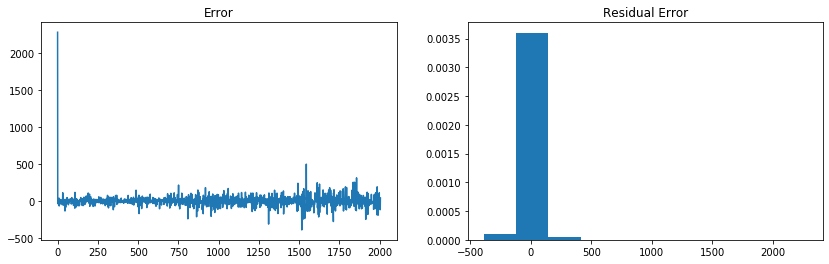

In [232]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [233]:
result.resid.skew()

14.092812400633012

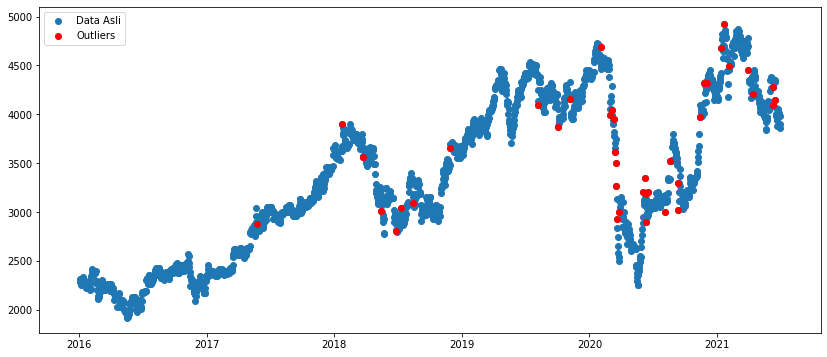

In [234]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Open'][out_index], c='Red', label='Outliers')
plt.legend()

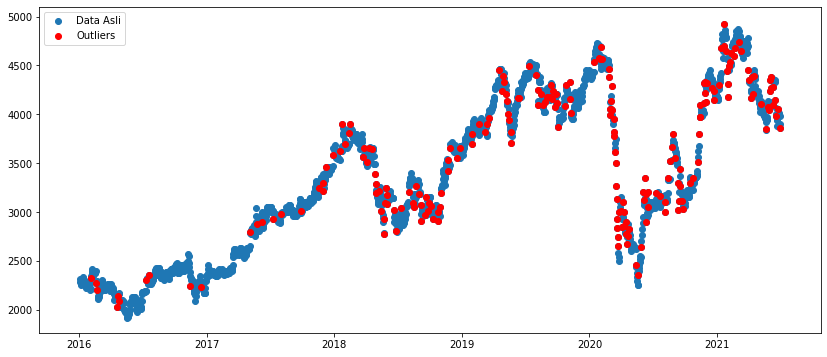

In [235]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Open'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


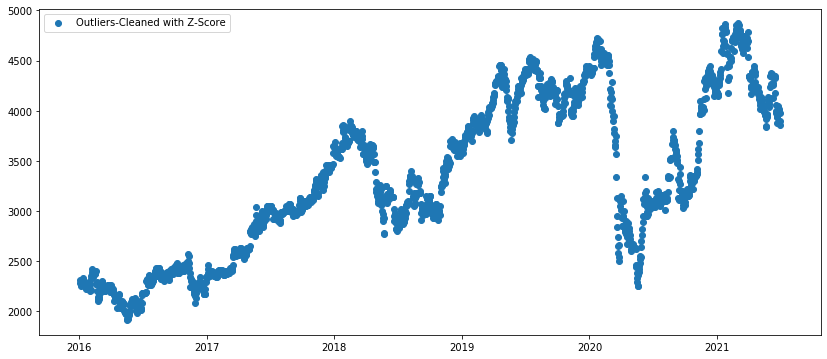

In [236]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
df_dummy_z = df_dummy.copy()
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Open'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Open'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Open'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


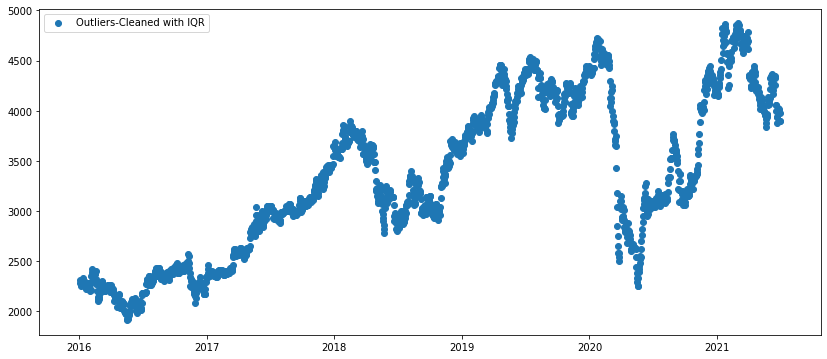

In [237]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
df_dummy_iqr = df_dummy.copy()
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Open'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Open'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Open'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

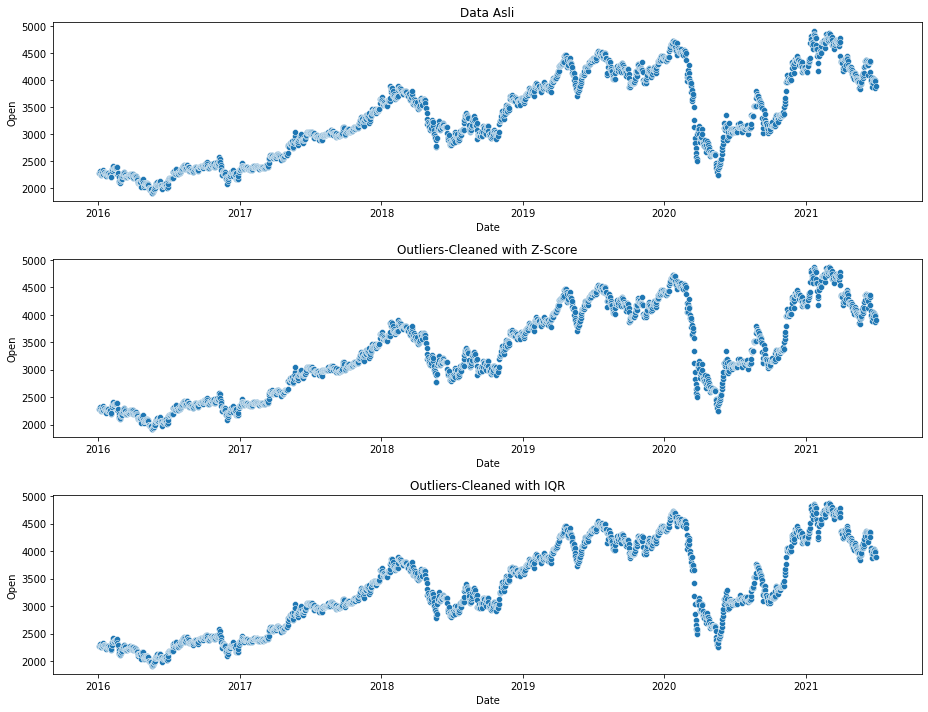

In [238]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Open'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Open'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Open'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 2) High

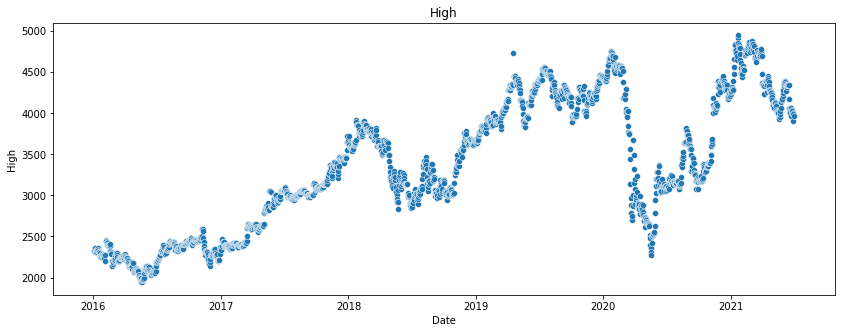

In [239]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('High')
sns.scatterplot(x=df['Date'], y=df['High'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [240]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [241]:
adfullertest(df['High'])

ADF Statistics: -1.7627748761574318
p-Value: 0.3990931752297062
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [242]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

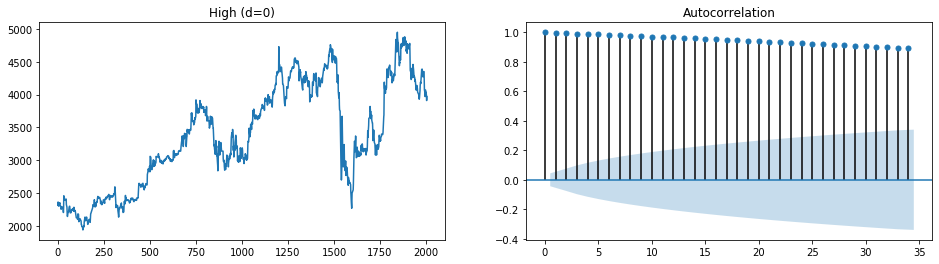

In [243]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'])
ax1.set_title('High (d=0)')
plot_acf(df['High'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

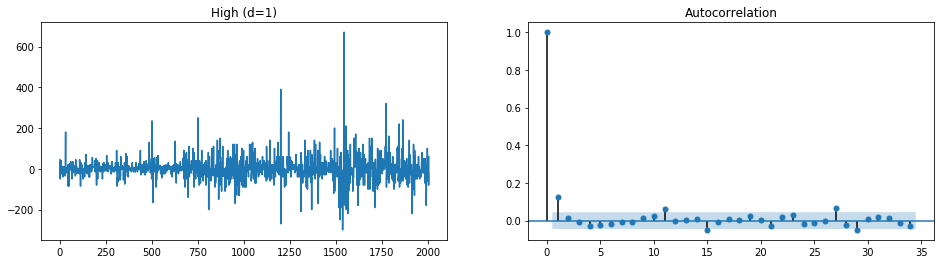

In [244]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_acf(df['High'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

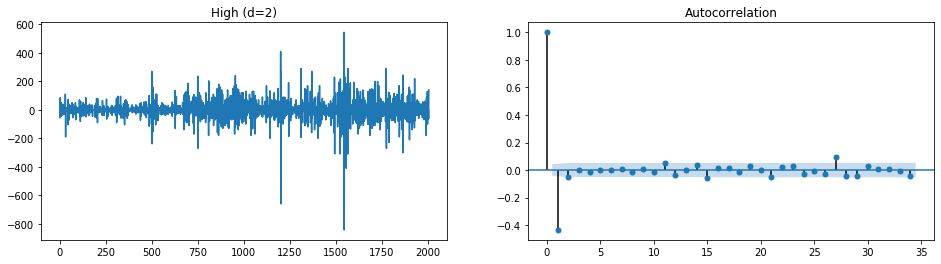

In [245]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().diff().dropna())
ax1.set_title('High (d=2)')
plot_acf(df['High'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [246]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['High'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

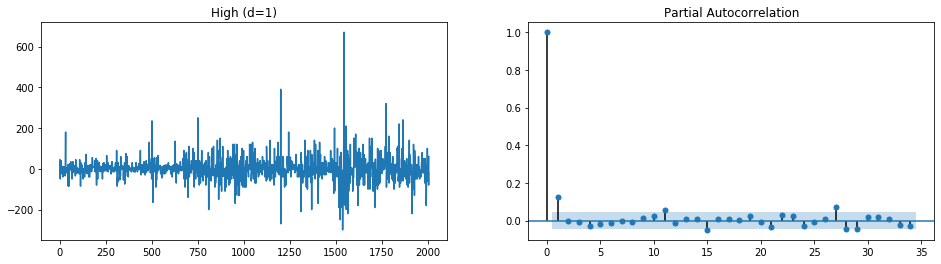

In [247]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_pacf(df['High'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

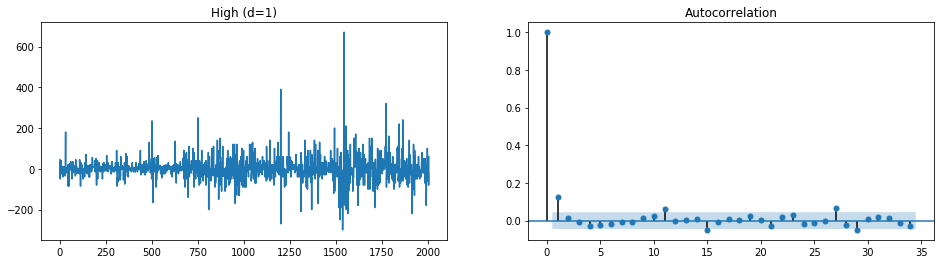

In [248]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_acf(df['High'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(1,1,1)

In [283]:
model = ARIMA(df['High'], order=(1,1,1))
result = model.fit()

In [284]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2005
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10651.975
Date:                Sat, 11 Dec 2021   AIC                          21309.951
Time:                        23:12:39   BIC                          21326.759
Sample:                             0   HQIC                         21316.122
                               - 2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1053      0.114      0.927      0.354      -0.117       0.328
ma.L1          0.0212      0.116      0.183      0.855      -0.206       0.248
sigma2      2424.8863     22.819    106.266      0.0

### Model Fitting

In [285]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['High'] - df_dummy['forecast']

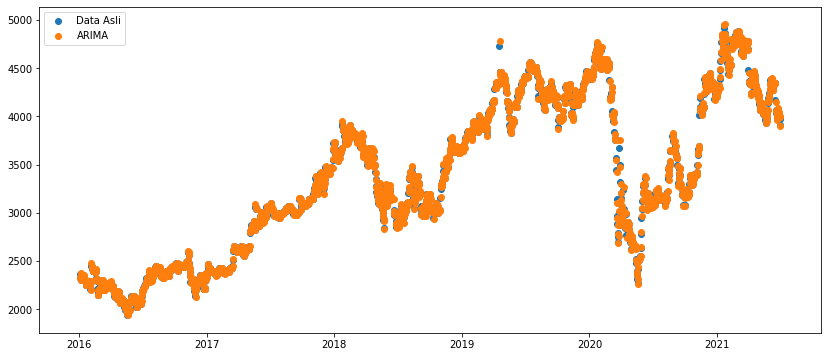

In [286]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

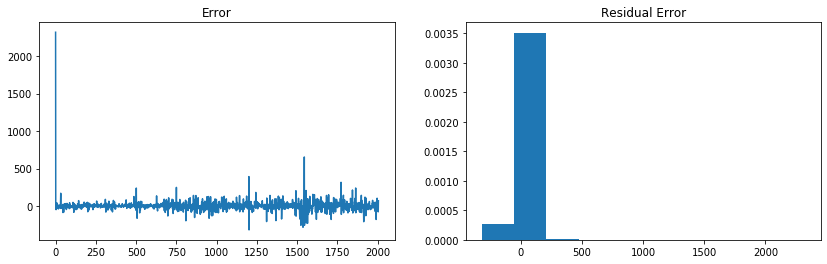

In [287]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [288]:
result.resid.skew()

17.424120895866732

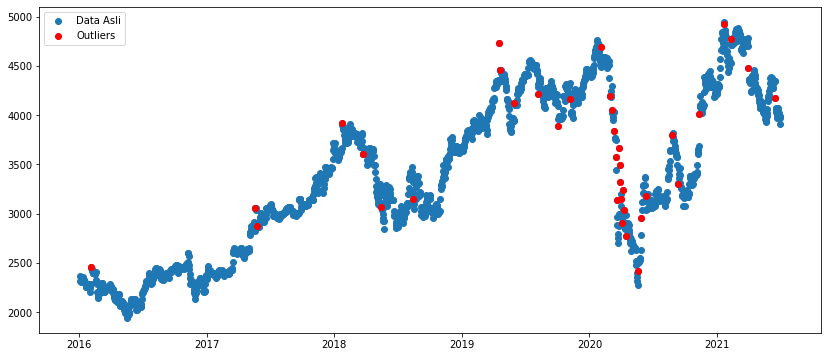

In [289]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['High'][out_index], c='Red', label='Outliers')
plt.legend()

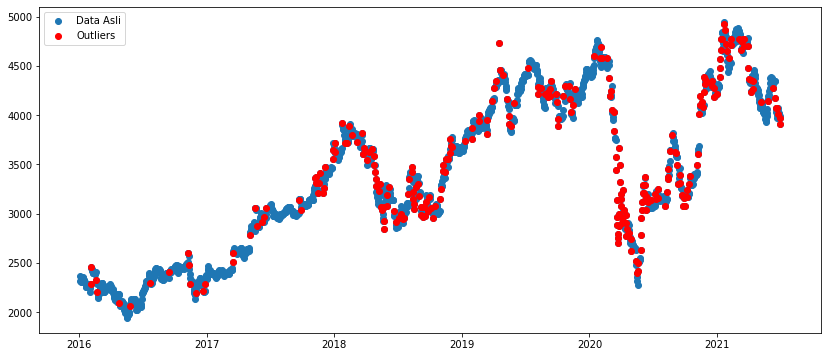

In [290]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['High'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


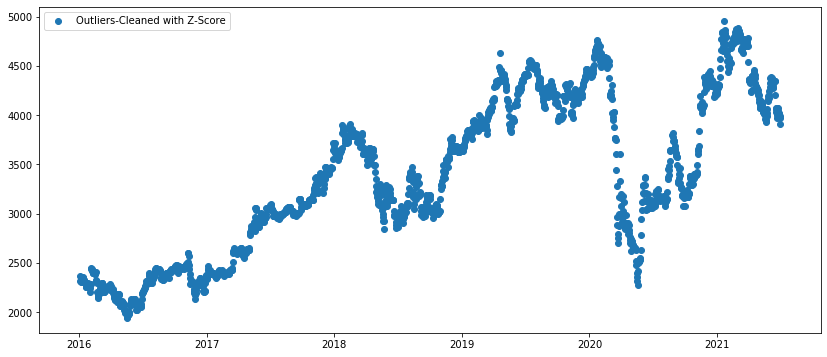

In [291]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['High'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['High'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['High'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


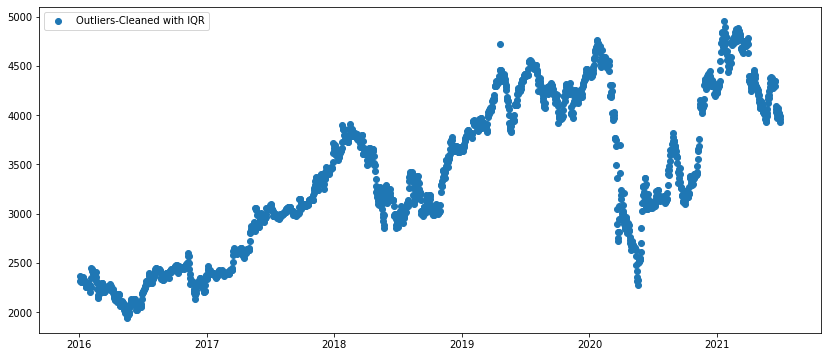

In [292]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['High'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['High'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['High'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

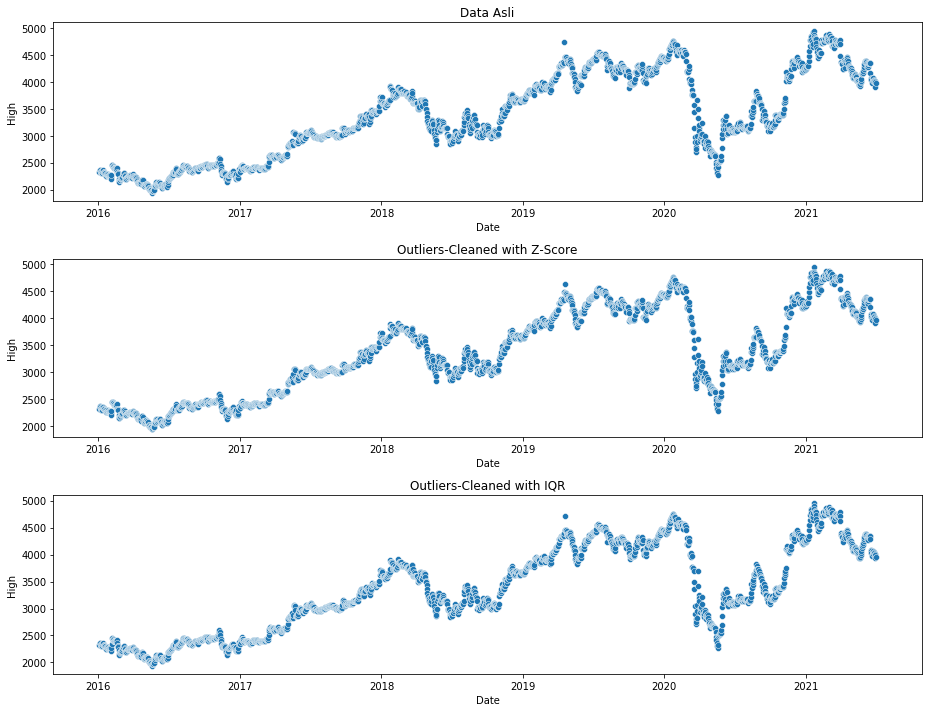

In [293]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['High'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['High'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['High'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 3) Low

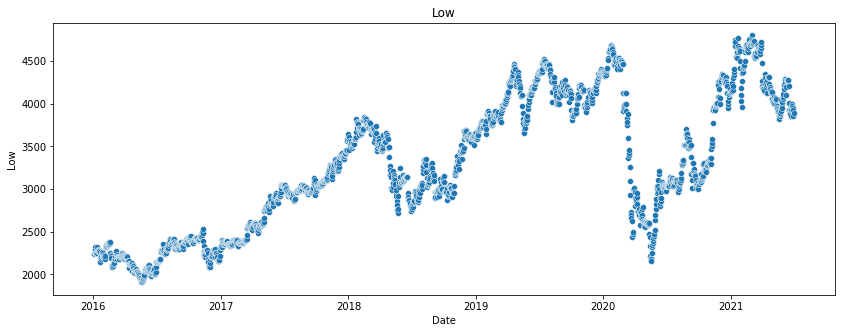

In [294]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Low')
sns.scatterplot(x=df['Date'], y=df['Low'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [295]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [296]:
adfullertest(df['Low'])

ADF Statistics: -1.8093598692409505
p-Value: 0.37582477958466554
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [297]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

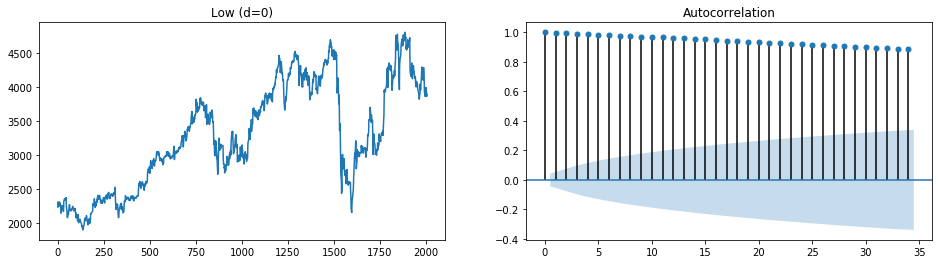

In [298]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'])
ax1.set_title('Low (d=0)')
plot_acf(df['Low'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

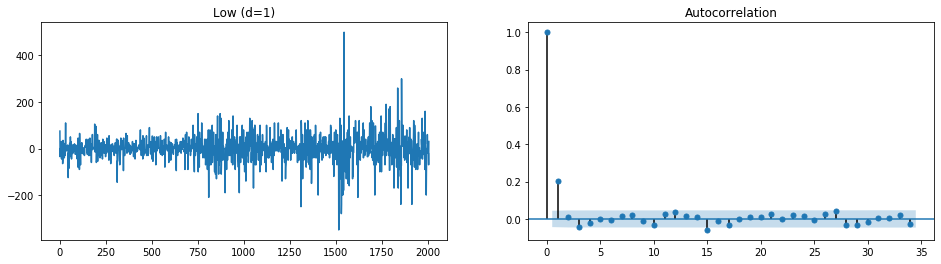

In [299]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_acf(df['Low'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

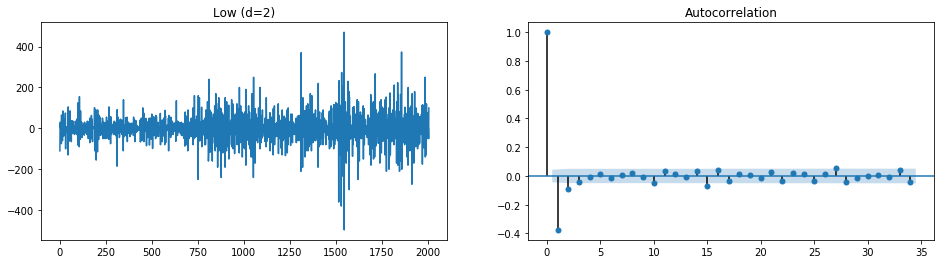

In [300]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().diff().dropna())
ax1.set_title('Low (d=2)')
plot_acf(df['Low'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [301]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Low'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

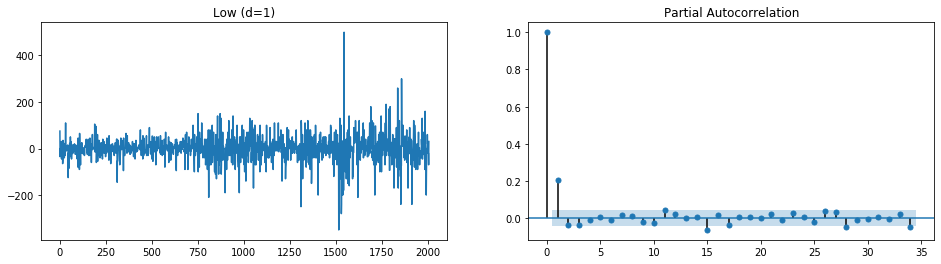

In [302]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_pacf(df['Low'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

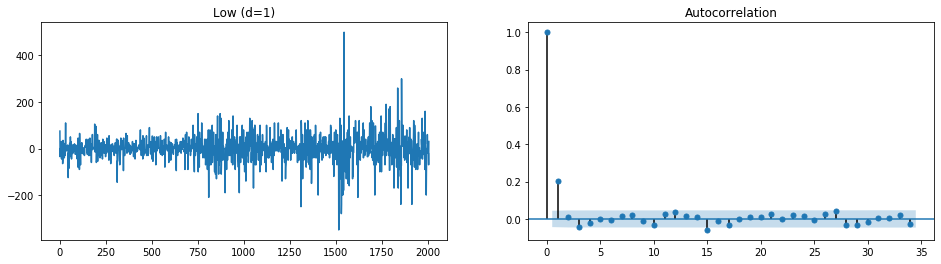

In [303]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_acf(df['Low'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 3.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(1,1,3)

In [311]:
model = ARIMA(df['Low'], order=(1,1,3))
result = model.fit()

In [312]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 2005
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -10580.456
Date:                Sat, 11 Dec 2021   AIC                          21170.911
Time:                        23:15:05   BIC                          21198.926
Sample:                             0   HQIC                         21181.197
                               - 2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4042      0.364      1.111      0.266      -0.309       1.117
ma.L1         -0.1929      0.363     -0.532      0.595      -0.904       0.518
ma.L2         -0.0673      0.077     -0.876      0.3

### Model Fitting

In [313]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Low'] - df_dummy['forecast']

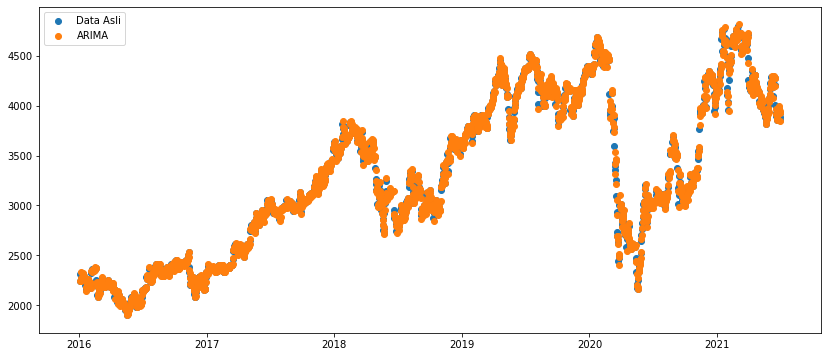

In [314]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

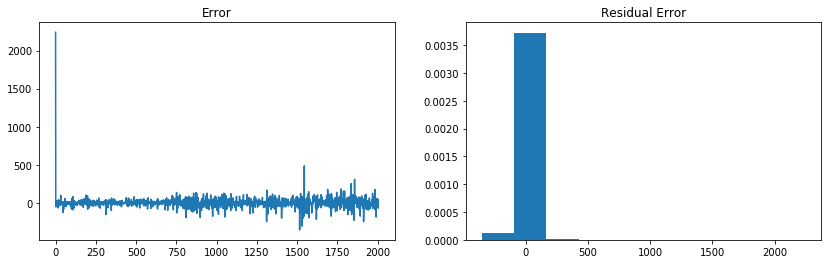

In [315]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [316]:
result.resid.skew()

17.004769524928463

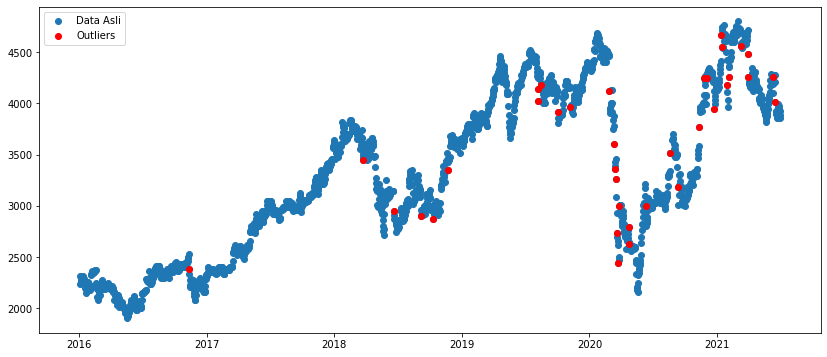

In [317]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Low'][out_index], c='Red', label='Outliers')
plt.legend()

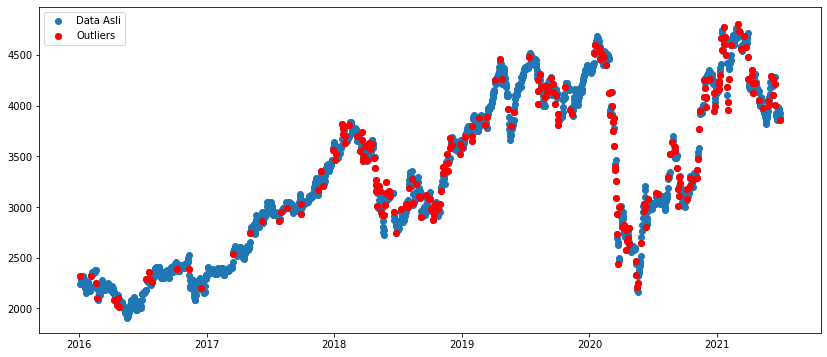

In [318]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Low'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


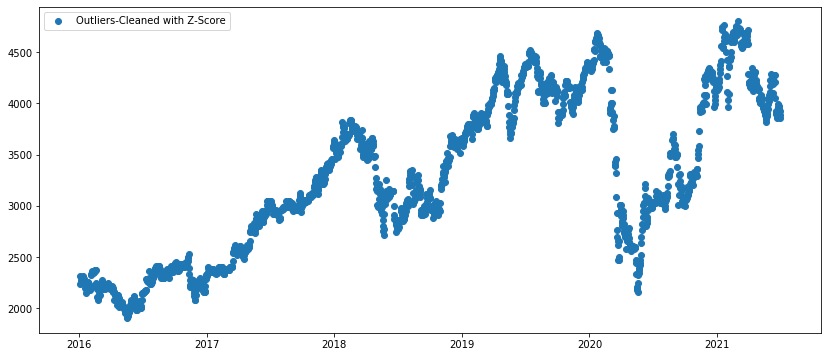

In [319]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Low'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Low'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Low'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


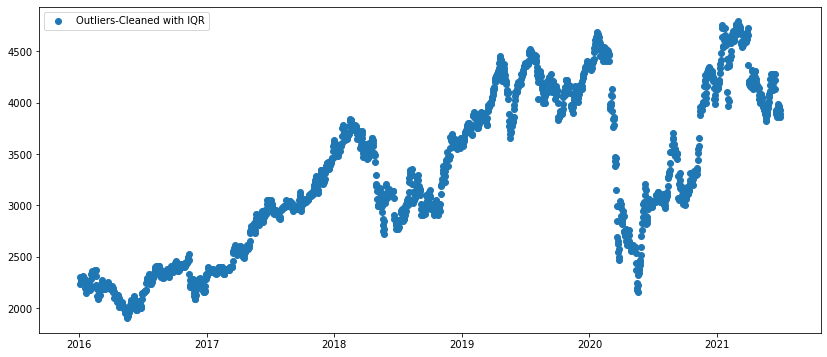

In [320]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Low'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Low'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Low'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

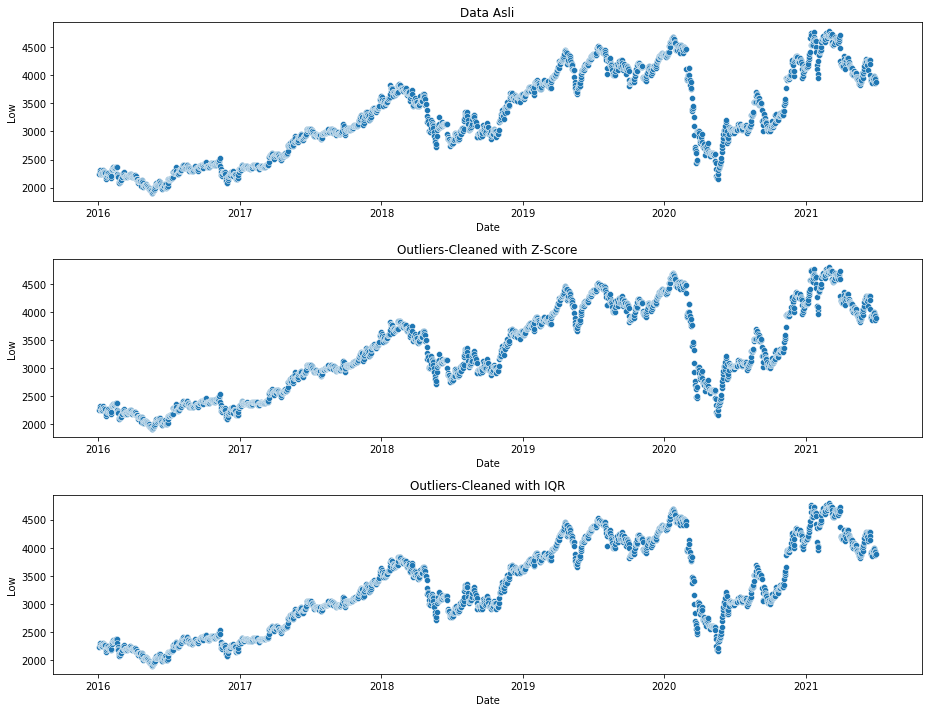

In [321]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Low'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Low'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Low'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 4) Volume

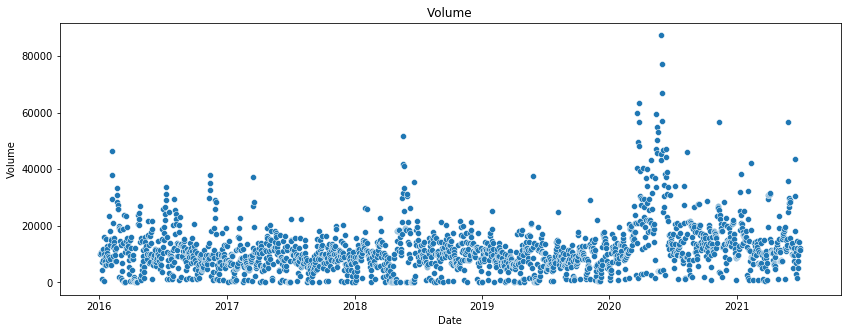

In [322]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Volume')
sns.scatterplot(x=df['Date'], y=df['Volume'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [323]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [324]:
adfullertest(df['Volume'])

ADF Statistics: -6.079219365364903
p-Value: 1.102509603977563e-07
Stationary


Hasil ADF Test menunjukkan p-value < 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data sudah bersifat stasioner. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [325]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Volume'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 0


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

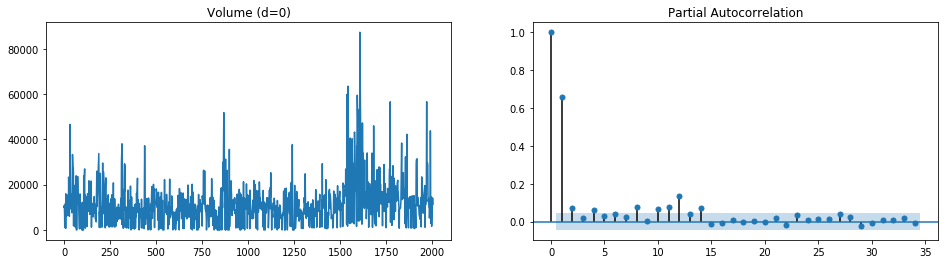

In [326]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Volume'].dropna())
ax1.set_title('Volume (d=0)')
plot_pacf(df['Volume'].dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 3.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

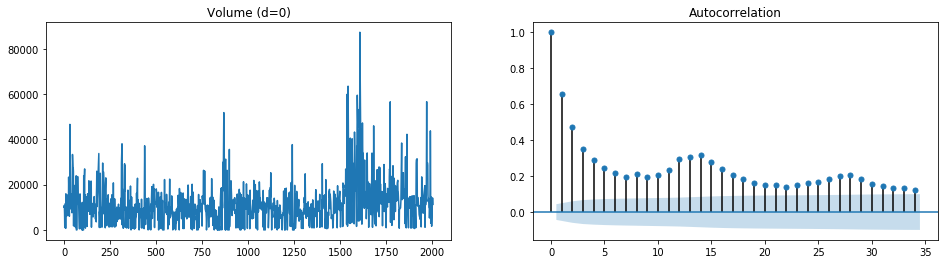

In [327]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Volume'].dropna())
ax1.set_title('Volume (d=0)')
plot_acf(df['Volume'].dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 3.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(3,0,3)

In [331]:
model = ARIMA(df['Volume'], order=(3,0,3))
result = model.fit()

In [332]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 2005
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -20436.843
Date:                Sat, 11 Dec 2021   AIC                          40889.686
Time:                        23:17:21   BIC                          40934.513
Sample:                             0   HQIC                         40906.144
                               - 2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.147e+04   1563.893      7.335      0.000    8406.080    1.45e+04
ar.L1          0.6218      0.054     11.564      0.000       0.516       0.727
ar.L2          0.8669      0.085     10.142      0.0

### Model Fitting

In [333]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Volume'] - df_dummy['forecast']

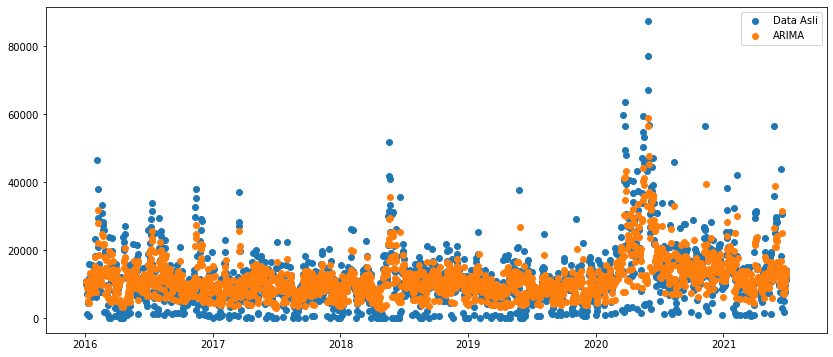

In [334]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

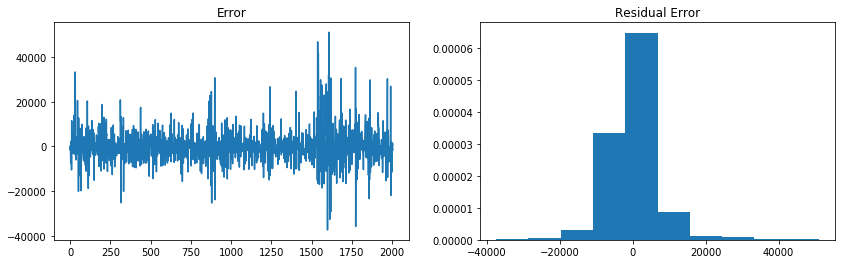

In [335]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [336]:
result.resid.skew()

1.045440888712984

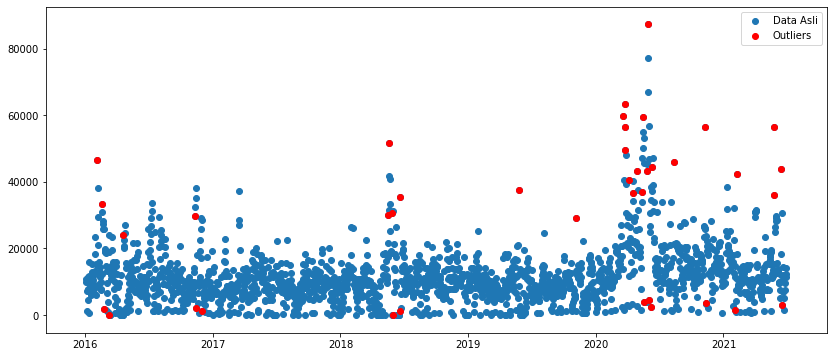

In [337]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Volume'][out_index], c='Red', label='Outliers')
plt.legend()

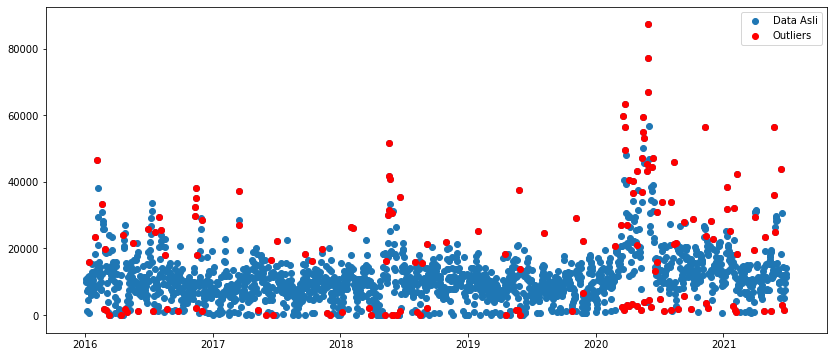

In [338]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Volume'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


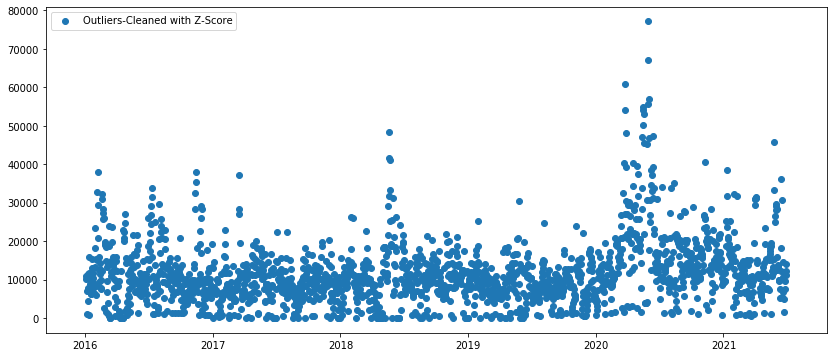

In [339]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Volume'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Volume'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Volume'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


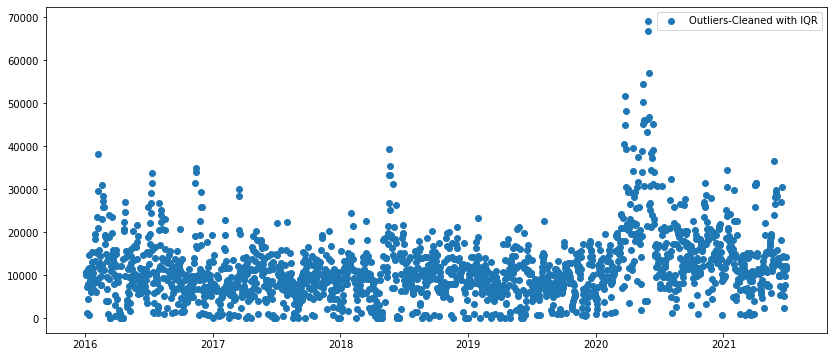

In [340]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Volume'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Volume'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Volume'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

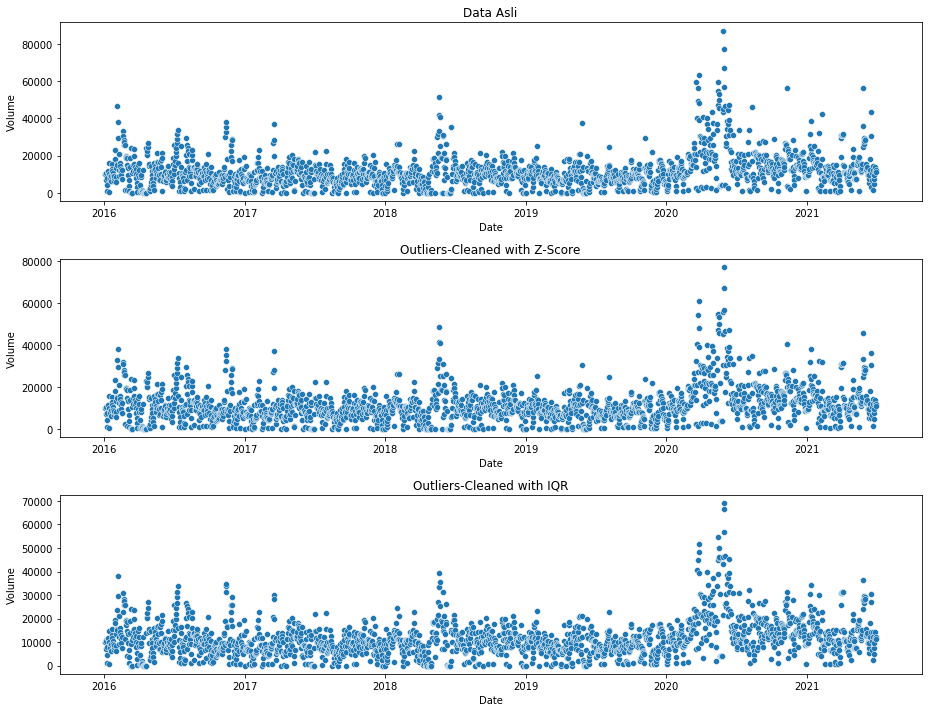

In [341]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Volume'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Volume'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Volume'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 5) Adj Close

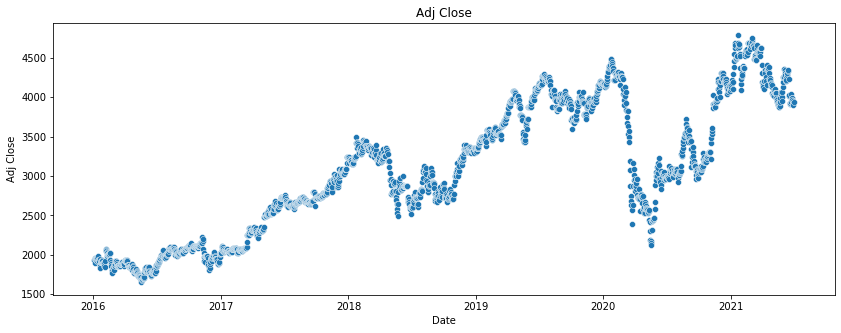

In [342]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Adj Close')
sns.scatterplot(x=df['Date'], y=df['Adj Close'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [343]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [344]:
adfullertest(df['Adj Close'])

ADF Statistics: -1.6489865969658948
p-Value: 0.45756899801248074
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [345]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

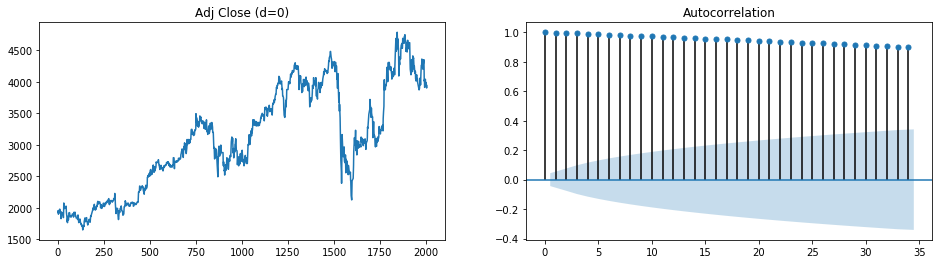

In [346]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'])
ax1.set_title('Adj Close (d=0)')
plot_acf(df['Adj Close'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

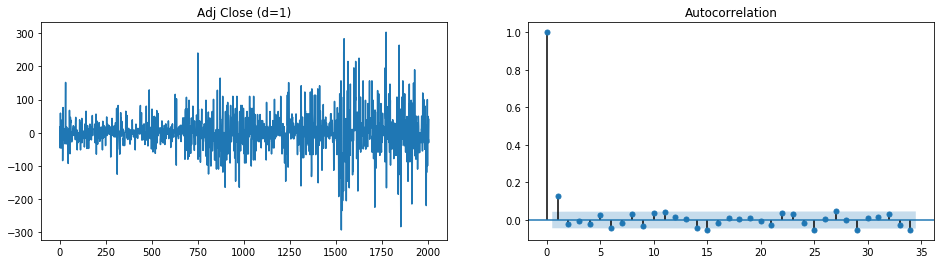

In [347]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_acf(df['Adj Close'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

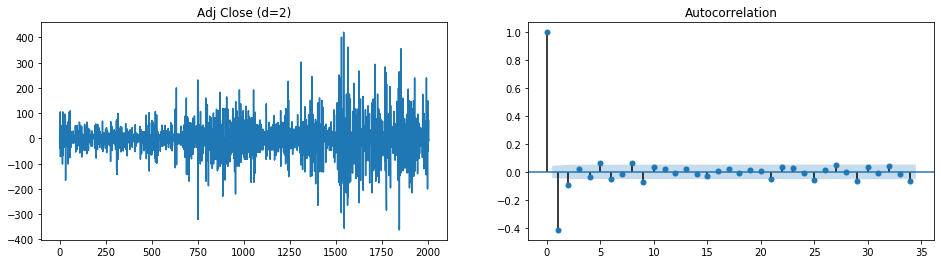

In [348]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().diff().dropna())
ax1.set_title('Adj Close (d=2)')
plot_acf(df['Adj Close'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [349]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Adj Close'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

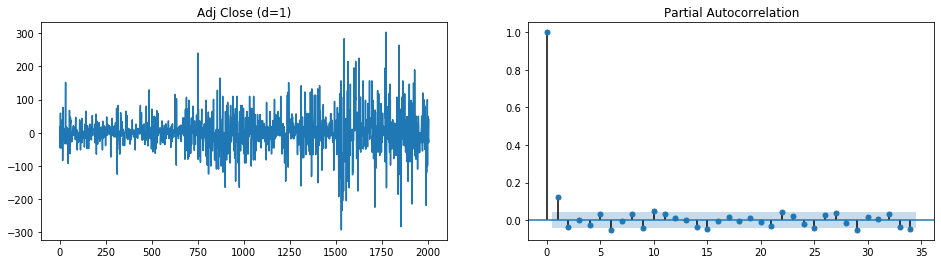

In [350]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_pacf(df['Adj Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 2.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

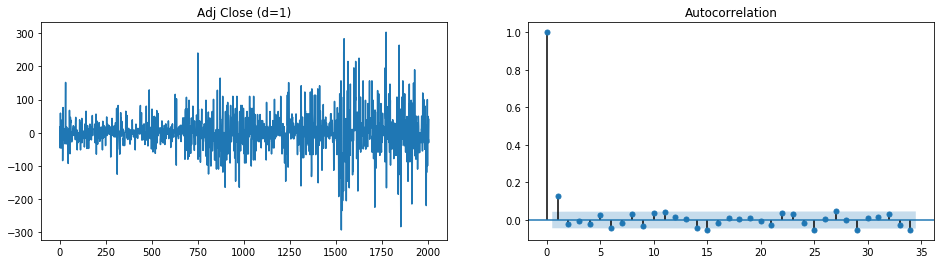

In [351]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_acf(df['Adj Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(2,1,1)

In [354]:
model = ARIMA(df['Adj Close'], order=(2,1,1))
result = model.fit()

In [355]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2005
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10611.228
Date:                Sat, 11 Dec 2021   AIC                          21230.457
Time:                        23:19:16   BIC                          21252.868
Sample:                             0   HQIC                         21238.685
                               - 2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0852      0.489      0.174      0.862      -0.873       1.044
ar.L2         -0.0309      0.065     -0.474      0.635      -0.159       0.097
ma.L1          0.0459      0.490      0.094      0.9

### Model Fitting

In [356]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Adj Close'] - df_dummy['forecast']

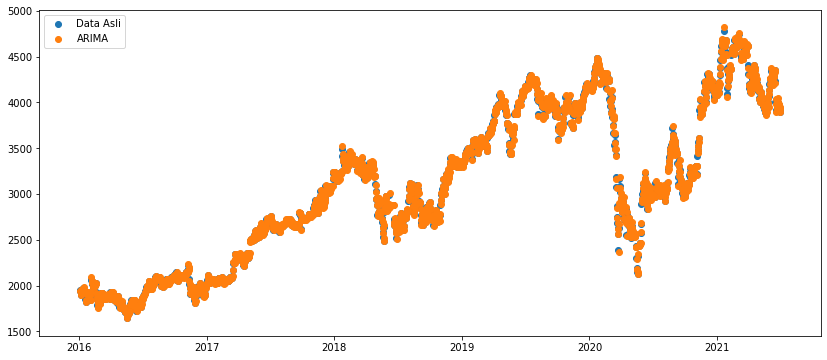

In [357]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

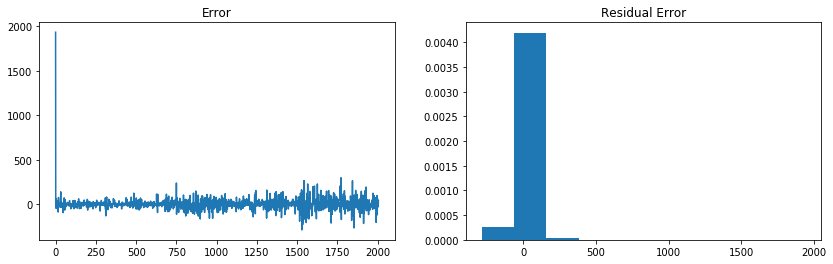

In [358]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [359]:
result.resid.skew()

13.360848336849328

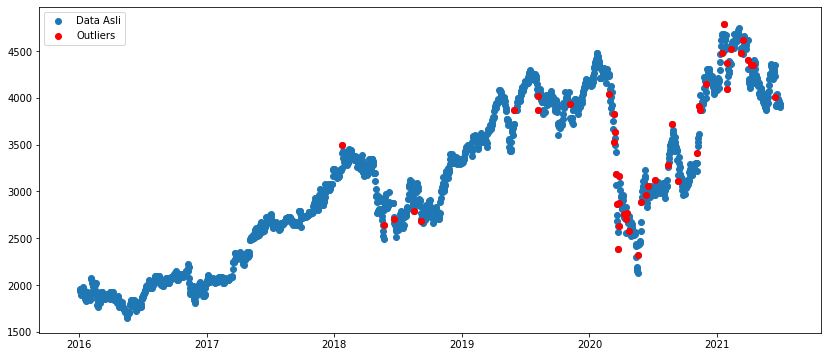

In [360]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Adj Close'][out_index], c='Red', label='Outliers')
plt.legend()

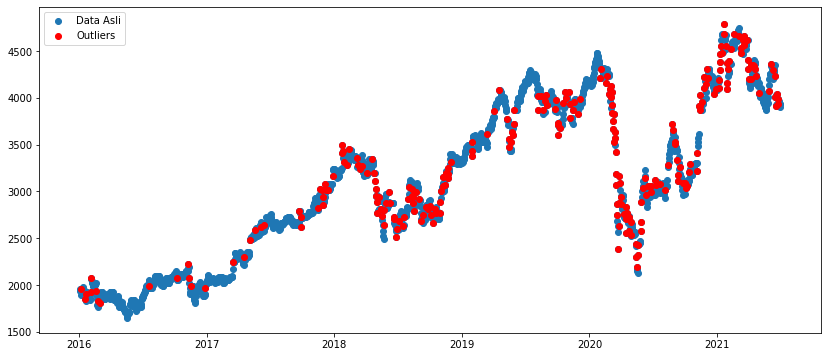

In [361]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Adj Close'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


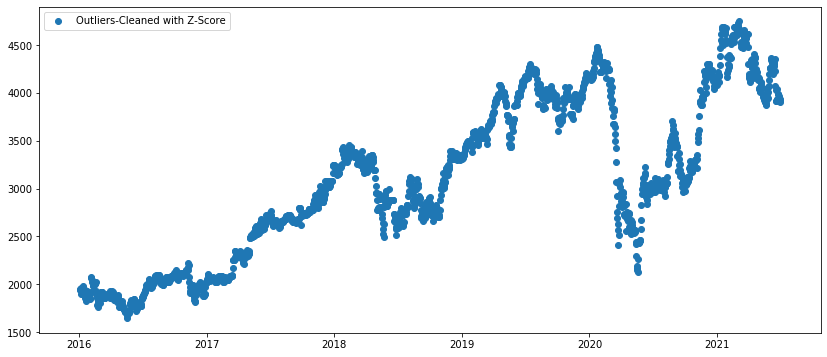

In [362]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Adj Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Adj Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Adj Close'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


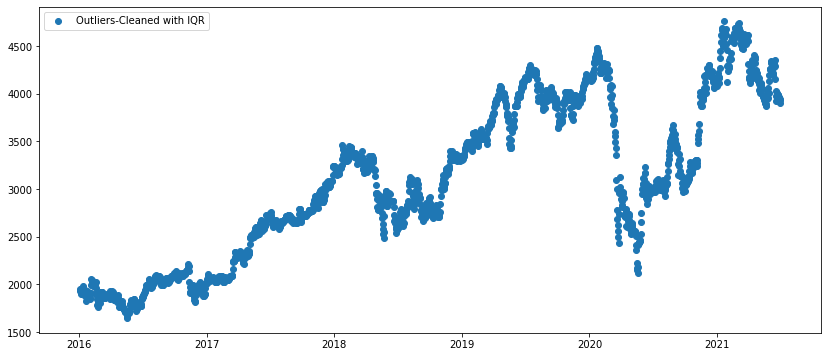

In [363]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Adj Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Adj Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Adj Close'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

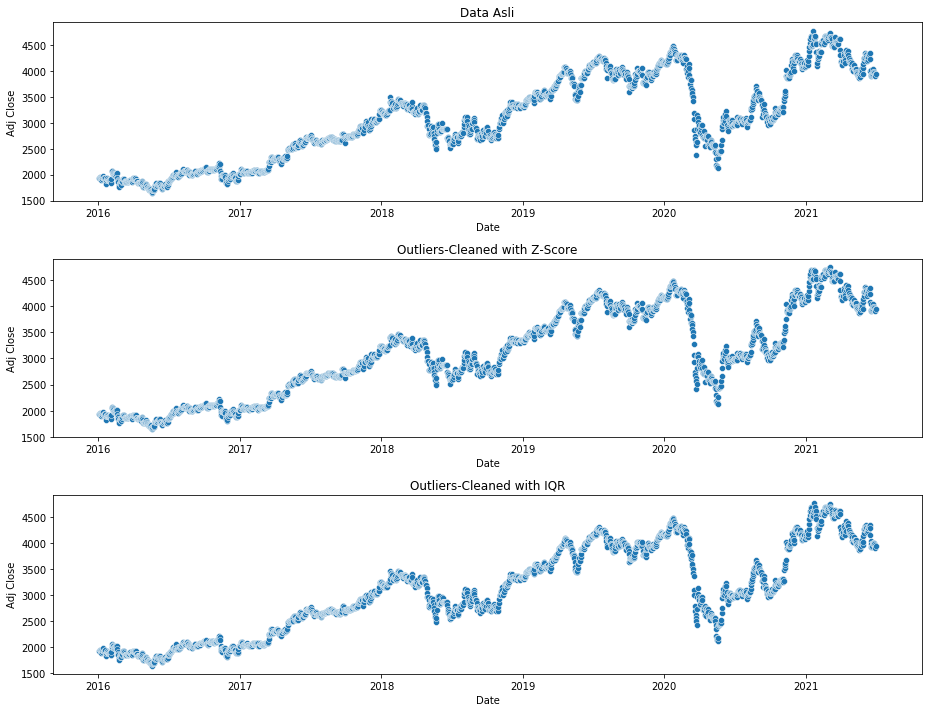

In [364]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Adj Close'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Adj Close'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Adj Close'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 6) Close

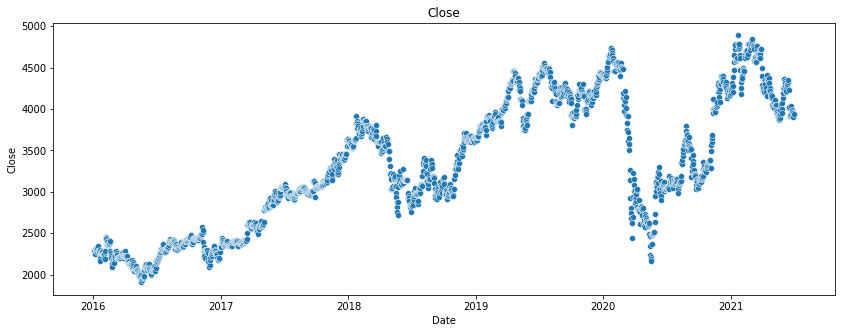

In [365]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Close')
sns.scatterplot(x=df['Date'], y=df['Close'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [366]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [367]:
adfullertest(df['Close'])

ADF Statistics: -1.7876044086412122
p-Value: 0.38663289393817735
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [368]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

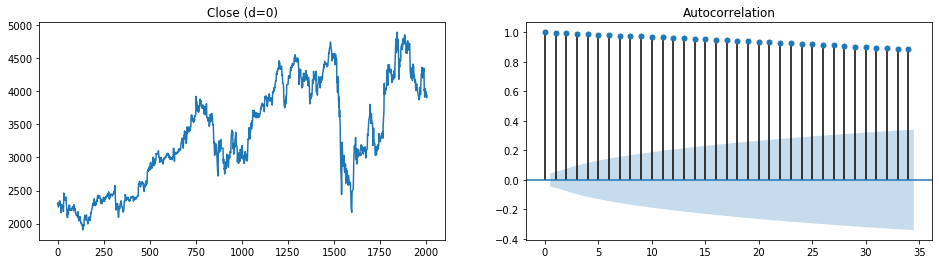

In [369]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'])
ax1.set_title('Close (d=0)')
plot_acf(df['Close'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

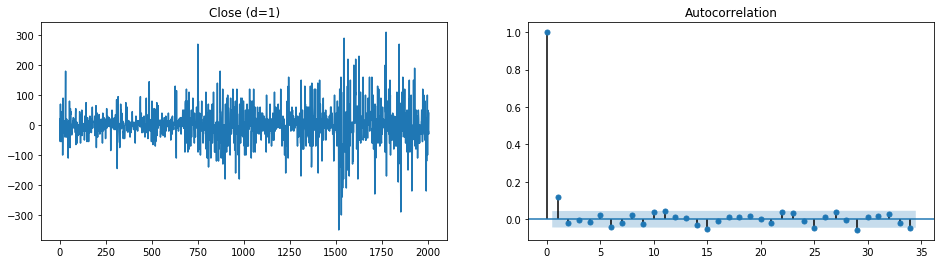

In [370]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_acf(df['Close'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

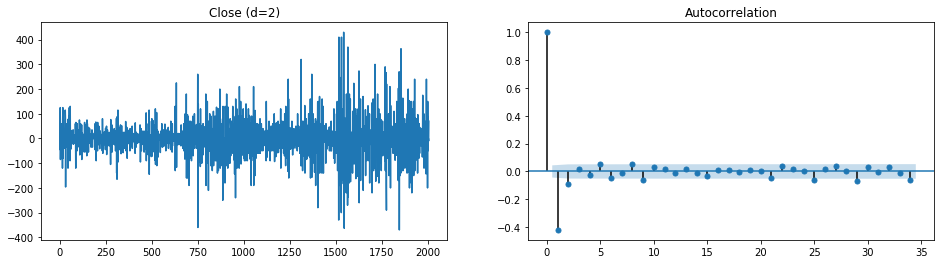

In [371]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().diff().dropna())
ax1.set_title('Close (d=2)')
plot_acf(df['Close'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [372]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Close'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

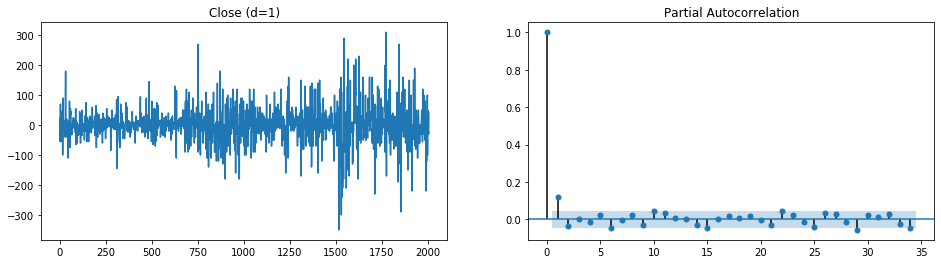

In [373]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_pacf(df['Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 2.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

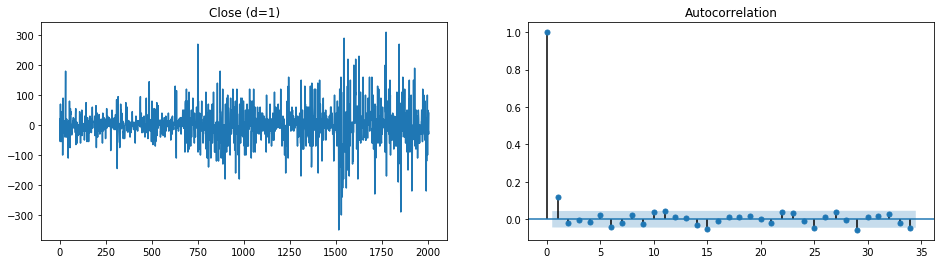

In [377]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_acf(df['Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(2,1,1)

In [378]:
model = ARIMA(df['Close'], order=(2,1,1))
result = model.fit()

In [379]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2005
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10730.310
Date:                Sat, 11 Dec 2021   AIC                          21468.619
Time:                        23:20:50   BIC                          21491.031
Sample:                             0   HQIC                         21476.848
                               - 2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5109      0.239     -2.137      0.033      -0.979      -0.042
ar.L2          0.0421      0.035      1.191      0.234      -0.027       0.111
ma.L1          0.6346      0.238      2.671      0.0

### Model Fitting

In [380]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Close'] - df_dummy['forecast']

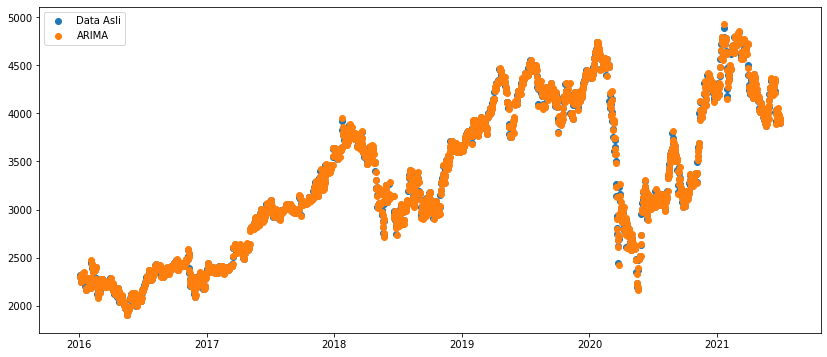

In [381]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

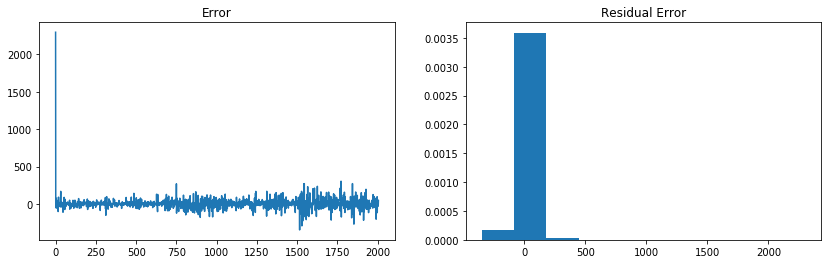

In [382]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [383]:
result.resid.skew()

15.862379739553822

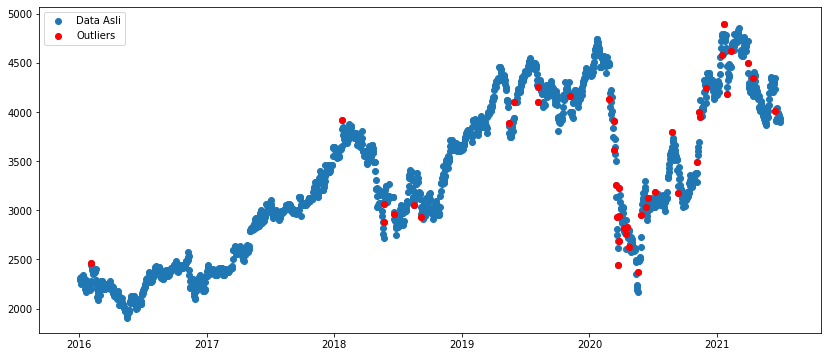

In [384]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Close'][out_index], c='Red', label='Outliers')
plt.legend()

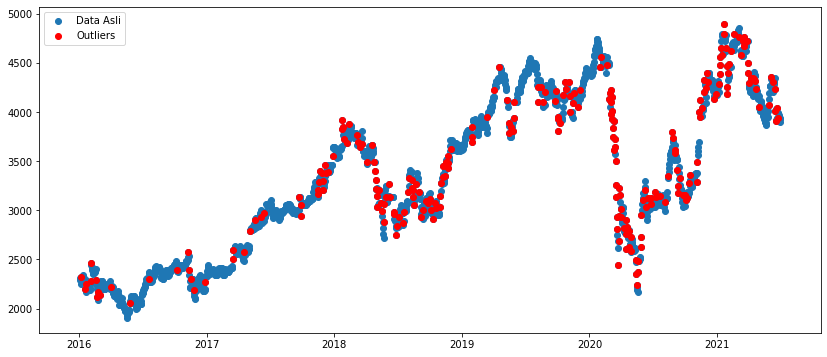

In [385]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Close'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


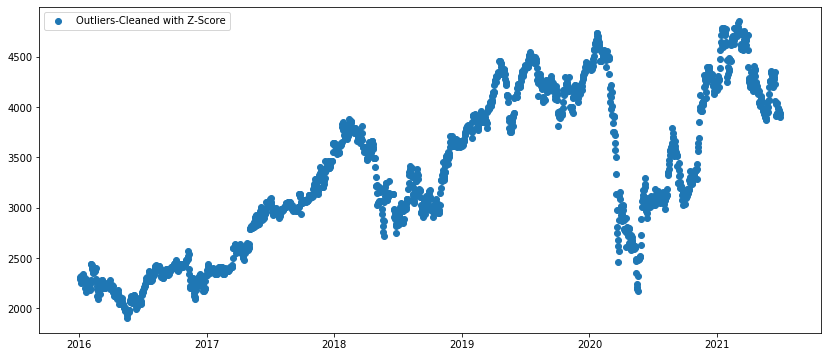

In [386]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Close'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


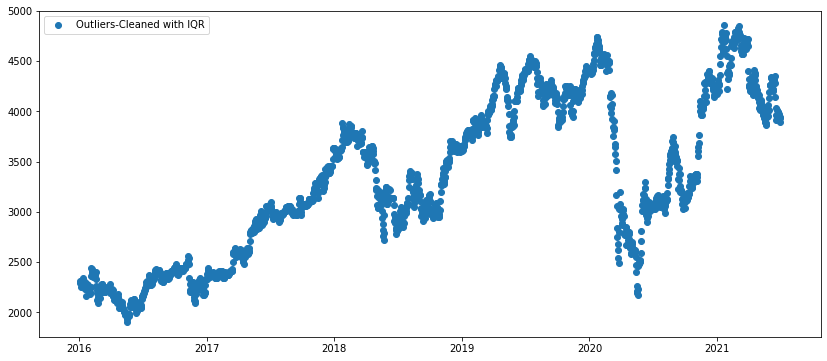

In [387]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Close'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

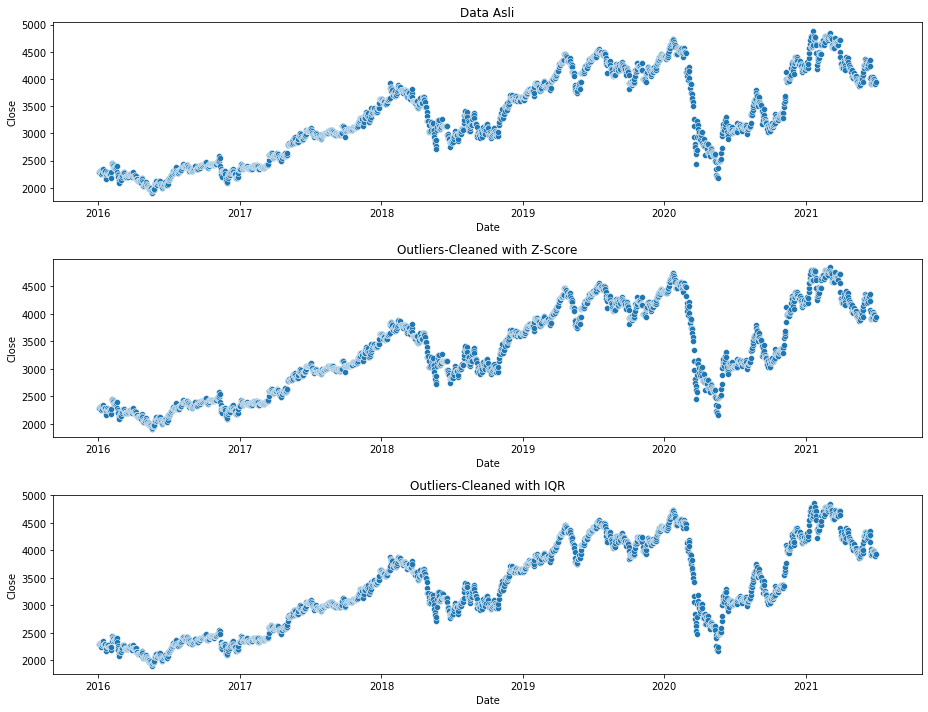

In [388]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Close'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Close'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Close'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### Saving Preprocessed Data

In [389]:
data = df.copy()

#### Opsi Data I

In [390]:
# Menggunakan Analisis Outliers dengan IQR untuk Error Time Series
data['Open'] = df_dummy_iqr['Open']
data['High'] = df_dummy_iqr['High']
data['Low'] = df_dummy_iqr['Low']
data['Volume'] = df_dummy_iqr['Volume']
data['Adj Close'] = df_dummy_iqr['Adj Close']
data['Close'] = df_dummy_iqr['Close']
data = data[['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']]
data

Date         Open         High          Low   Volume    Adj Close  \
0    2016-01-04  2280.000000  2320.000000  2240.000000  10038.0  1935.290000   
1    2016-01-05  2315.000000  2365.000000  2308.260259  10804.0  1952.160000   
2    2016-01-06  2280.000000  2355.000000  2280.000000  10513.0  1943.730000   
3    2016-01-07  2270.000000  2305.000000  2250.000000   7128.0  1897.350000   
4    2016-01-08  2250.000000  2340.000000  2250.000000   1065.0  1955.074411   
...         ...          ...          ...          ...      ...          ...   
2000 2021-06-26  4013.333333  4023.333333  3970.000000   9747.0  3970.000000   
2001 2021-06-27  3996.666667  4006.666667  3950.000000  11935.0  3950.000000   
2002 2021-06-28  3980.000000  3990.000000  3930.000000  14123.0  3930.000000   
2003 2021-06-29  3896.112276  3929.529461  3862.431419  12177.0  3900.000000   
2004 2021-06-30  3900.000000  3958.321128  3890.000000  11285.0  3940.000000   

           Close  
0     2295.00000  
1     2315.00000  
2     2305.00000  
3     2250.00000  
4     2313.15347  
...          ...  
2000  3970.00000  
2001  3950.00000  
2002  3930.00000  
2003  3900.00000  
2004  3940.00000  

[2005 rows x 7 columns]

In [391]:
data.to_csv('BRI_Preprocessed_Data', index=False)